This script involves the comparison of the experimental co-crystals with the already known co-crystals found in CSD database.\
-The first part involves the direct calculations of the euclidean distances between the two experimental structures and the rest of our labeled dataset.\
-The second part involves the UMAP 2D visualization of the whole co-crystal space and highlighting on that map the pyrene co-crystals, the experimental compunds and the euclidean neighbours to them



In [1]:
# Import the main libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
dataset1 = pd.read_csv('/content/drive/My Drive/cocrystal_design/data/coformers1.csv')
dataset2 = pd.read_csv('/content/drive/My Drive/cocrystal_design/data/coformers2.csv')
dataset1.head()

,Identifier,NAME,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,nAT,nSK,nBT,nBO,nBM,SCBO,RBN,RBF,nDB,nTB,nAB,nH,nC,nN,nO,nP,nS,nF,nCL,nBR,nHM,nHet,nX,H%,C%,N%,O%,X%,...,Ui,Hy,AMR,TPSA(NO),TPSA(Tot),MLOGP,MLOGP2,ALOGP,ALOGP2,SAtot,SAacc,Vx,VvdwMG,VvdwZAZ,PDI,BLTF96,BLTD48,BLTA96,cRo5,DLS_01,DLS_02,DLS_03,DLS_04,DLS_05,DLS_06,DLS_cons,LLS_01,LLS_02,CMC-80,CMC-50,Inflammat-80,Inflammat-50,Depressant-80,Psychotic-80,Hypertens-80,Hypnotic-80,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,WOVMEB,Cc1ccccc1C,106.18,5.899,10.634,17.418,11.807,20.076,0.591,0.968,0.656,1.115,18,8,18,8,6,11.0,0,0.000,0,0,6,10,8,0,0,0,0,0,0,0,0,0,0,55.6,44.4,0.0,0.0,0.0,...,2.000,-0.946,36.140,0.00,0.00,2.942,8.653,2.802,7.853,179.638,0.000,165.814,71.334,115.78,0.923,-3.89,-4.11,-4.17,1,1.00,0.50,0.83,0.7,0.0,1.00,0.72,1.00,0.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PIWKEL,O=C1C=CC2=C(C=C1)C(=O)C1=C(C=CC(=O)C=C1)C2=O,264.24,9.437,20.966,28.844,20.864,30.498,0.749,1.030,0.745,1.089,28,20,30,22,10,32.0,0,0.000,10,0,0,8,16,0,4,0,0,0,0,0,0,4,0,28.6,57.1,0.0,14.3,0.0,...,3.459,-0.787,78.415,68.28,68.28,1.749,3.058,0.969,0.939,303.835,100.580,305.980,128.779,257.04,1.007,-2.88,-2.98,-2.98,1,1.00,0.83,1.00,0.4,0.0,1.00,0.75,0.67,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
2,OTIHIJ,CN(C)c1ccc(cc1)C(C(C1=CC=C2C=CC=CC=C12)C1=C2C=...,520.76,6.852,48.998,74.225,52.955,84.055,0.645,0.977,0.697,1.106,76,40,81,45,34,62.0,7,0.086,0,0,34,36,38,2,0,0,0,0,0,0,0,2,0,47.4,50.0,2.6,0.0,0.0,...,4.170,-0.944,171.441,6.48,6.48,6.906,47.688,8.970,80.461,700.619,6.249,718.073,297.669,506.16,1.025,-7.26,-7.88,-8.14,0,0.50,0.50,0.67,0.4,0.5,0.67,0.60,0.50,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DABLOJ,CCOC(C)=O,88.12,6.294,7.537,14.189,7.955,16.080,0.538,1.014,0.568,1.149,14,6,13,5,1,6.0,2,0.154,1,0,0,8,4,0,2,0,0,0,0,0,0,2,0,57.1,28.6,0.0,14.3,0.0,...,1.000,-0.614,22.161,26.30,26.30,0.586,0.344,0.370,0.137,159.748,36.145,124.020,54.205,92.70,0.776,-1.89,-1.88,-1.82,1,1.00,0.83,0.83,1.0,1.0,1.00,0.95,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PIGJUK,CSC1=Cc2ccc3SC(=Cc4ccc(S1)c2c34)SC,332.56,10.393,23.909,31.607,27.159,34.171,0.747,0.988,0.849,1.068,32,20,35,23,13,30.5,2,0.057,2,0,11,12,16,0,0,0,4,0,0,0,4,4,0,37.5,50.0,0.0,0.0,0.0,...,3.087,-0.787,99.705,0.00,107.08,5.373,28.870,5.646,31.875,355.988,0.000,379.003,158.706,269.68,1.065,-5.96,-6.42,-6.60,1,0.75,0.67,0.83,0.2,0.0,0.83,0.61,0.50,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df1=dataset1.iloc[:,2:]
df1 = df1.fillna(df1.mean())
df2=dataset2.iloc[:,2:]
df2 = df2.fillna(df2.mean())
df1=df1.dropna(axis=1)
df2=df2[df1.columns.values]
df1.head()

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,nAT,nSK,nBT,nBO,nBM,SCBO,RBN,RBF,nDB,nTB,nAB,nH,nC,nN,nO,nP,nS,nF,nCL,nBR,nHM,nHet,nX,H%,C%,N%,O%,X%,nCsp3,nCsp2,...,Ui,Hy,AMR,TPSA(NO),TPSA(Tot),MLOGP,MLOGP2,ALOGP,ALOGP2,SAtot,SAacc,Vx,VvdwMG,VvdwZAZ,PDI,BLTF96,BLTD48,BLTA96,cRo5,DLS_01,DLS_02,DLS_03,DLS_04,DLS_05,DLS_06,DLS_cons,LLS_01,LLS_02,CMC-80,CMC-50,Inflammat-80,Inflammat-50,Depressant-80,Psychotic-80,Hypertens-80,Hypnotic-80,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,106.18,5.899,10.634,17.418,11.807,20.076,0.591,0.968,0.656,1.115,18,8,18,8,6,11.0,0,0.000,0,0,6,10,8,0,0,0,0,0,0,0,0,0,0,55.6,44.4,0.0,0.0,0.0,2,6,...,2.000,-0.946,36.140,0.00,0.00,2.942,8.653,2.802,7.853,179.638,0.000,165.814,71.334,115.78,0.923,-3.89,-4.11,-4.17,1,1.00,0.50,0.83,0.7,0.0,1.00,0.72,1.00,0.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,264.24,9.437,20.966,28.844,20.864,30.498,0.749,1.030,0.745,1.089,28,20,30,22,10,32.0,0,0.000,10,0,0,8,16,0,4,0,0,0,0,0,0,4,0,28.6,57.1,0.0,14.3,0.0,0,16,...,3.459,-0.787,78.415,68.28,68.28,1.749,3.058,0.969,0.939,303.835,100.580,305.980,128.779,257.04,1.007,-2.88,-2.98,-2.98,1,1.00,0.83,1.00,0.4,0.0,1.00,0.75,0.67,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
2,520.76,6.852,48.998,74.225,52.955,84.055,0.645,0.977,0.697,1.106,76,40,81,45,34,62.0,7,0.086,0,0,34,36,38,2,0,0,0,0,0,0,0,2,0,47.4,50.0,2.6,0.0,0.0,6,32,...,4.170,-0.944,171.441,6.48,6.48,6.906,47.688,8.970,80.461,700.619,6.249,718.073,297.669,506.16,1.025,-7.26,-7.88,-8.14,0,0.50,0.50,0.67,0.4,0.5,0.67,0.60,0.50,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,88.12,6.294,7.537,14.189,7.955,16.080,0.538,1.014,0.568,1.149,14,6,13,5,1,6.0,2,0.154,1,0,0,8,4,0,2,0,0,0,0,0,0,2,0,57.1,28.6,0.0,14.3,0.0,3,1,...,1.000,-0.614,22.161,26.30,26.30,0.586,0.344,0.370,0.137,159.748,36.145,124.020,54.205,92.70,0.776,-1.89,-1.88,-1.82,1,1.00,0.83,0.83,1.0,1.0,1.00,0.95,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,332.56,10.393,23.909,31.607,27.159,34.171,0.747,0.988,0.849,1.068,32,20,35,23,13,30.5,2,0.057,2,0,11,12,16,0,0,0,4,0,0,0,4,4,0,37.5,50.0,0.0,0.0,0.0,2,14,...,3.087,-0.787,99.705,0.00,107.08,5.373,28.870,5.646,31.875,355.988,0.000,379.003,158.706,269.68,1.065,-5.96,-6.42,-6.60,1,0.75,0.67,0.83,0.2,0.0,0.83,0.61,0.50,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Detect the combinations that contain pyrene as a first or second molecule in the pair

pyrene_cocrystals1 = dataset1[dataset1.NAME == 'c1cc2ccc3cccc4ccc(c1)c2c34']
pyrene_cocrystals2 = dataset2[dataset2.NAME == 'c1cc2ccc3cccc4ccc(c1)c2c34']
pyrene_cocrystals = pd.concat([pyrene_cocrystals1, pyrene_cocrystals2]).Identifier.values
print(len(pyrene_cocrystals))
pyrene_cocrystals

52


array(['CEKBUP', 'CENTOH', 'FARNOD', 'MURPYR', 'PAYYOG', 'PYRCBZ02',
       'PYRCYE02', 'BEFGIC', 'FETYAE', 'GUQQAM', 'PINJUU03', 'TUYVUF',
       'AYEGAM', 'BAZCUA', 'BAZDAH', 'BORPII', 'CILRAQ', 'CORPIJ',
       'CUNWUD', 'ECUVIH', 'EHESIT', 'EHESOZ', 'FARNIX', 'GUMNUY',
       'GUQRAN', 'HAYYOW', 'MIDDEL', 'PYRBZQ01', 'PYRCLN', 'PYRFLR01',
       'PYRPMA11', 'PYRTCQ03', 'PYRTNB', 'PYTQIM', 'QEVWEW', 'QEVXOH',
       'REDCIM01', 'REDFIP', 'UZEGOX', 'WAWPAM', 'ZZZGKE02', 'AGOREW',
       'CUSZUM', 'EHETEQ', 'GUQQEQ', 'GUQQIU', 'GUQQOA', 'GUQQUG',
       'ISISAG', 'MIDDIP', 'PYRBPC', 'REQVOZ'], dtype=object)

In [6]:
# Construct the labelled dataset by contatenating the feature set of each coformer in both orders
# We have a vector of 50 dimensions now
def concat_bidirectional(dataset_1, dataset_2):

  return pd.concat([pd.concat([dataset1['Identifier'], dataset_1, dataset_2], axis=1), pd.concat([dataset1['Identifier'],dataset_2, dataset_1], axis=1) ])


In [7]:
# Standarize the dataset
# Standarize the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
#X_scaler = StandardScaler()

df_concat = pd.concat([df1, df2])
df_concat = df_concat.drop_duplicates(keep='first')
numerical_cols = df_concat.columns[:]
df_scaled = pd.DataFrame(X_scaler.fit(df_concat), columns=numerical_cols, index=df_concat.index)

numerical_cols = df2.columns[:]
df1_scaled =  pd.DataFrame(X_scaler.transform(df1[numerical_cols]), columns=numerical_cols, index=df1.index)
df2_scaled = pd.DataFrame(X_scaler.transform(df2[numerical_cols]), columns=numerical_cols, index=df2.index)

# Final bidirectional concatenated dataset, after feature selection and scaling 
df=dfna = concat_bidirectional(df1_scaled,df2_scaled)

# Final bidirectional concatenated dataset, after feature selection and scaling 
#df_ratios = pd.concat([df1, pd.concat([dataset['Z'], dataset['Z']])], axis=1, ignore_index=True)
dfna

,Identifier,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,nAT,nSK,nBT,nBO,nBM,SCBO,RBN,RBF,nDB,nTB,nAB,nH,nC,nN,nO,nP,nS,nF,nCL,nBR,nHM,nHet,nX,H%,C%,N%,O%,X%,nCsp3,...,Ui,Hy,AMR,TPSA(NO),TPSA(Tot),MLOGP,MLOGP2,ALOGP,ALOGP2,SAtot,SAacc,Vx,VvdwMG,VvdwZAZ,PDI,BLTF96,BLTD48,BLTA96,cRo5,DLS_01,DLS_02,DLS_03,DLS_04,DLS_05,DLS_06,DLS_cons,LLS_01,LLS_02,CMC-80,CMC-50,Inflammat-80,Inflammat-50,Depressant-80,Psychotic-80,Hypertens-80,Hypnotic-80,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,WOVMEB,0.012474,0.041630,0.016615,0.018627,0.017335,0.021339,0.186087,0.215152,0.125156,0.408922,0.021390,0.016043,0.023018,0.013825,0.034483,0.019737,0.000000,0.000000,0.0000,0.0,0.034483,0.047619,0.031579,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.794286,0.551977,0.000000,0.000000,0.0,0.020833,...,0.766992,0.085463,0.435853,0.000000,0.846523,0.725989,0.273423,0.585007,0.304192,0.014852,0.015050,0.497439,0.497439,0.408947,0.260783,0.383961,0.384058,0.384165,0.0,0.333333,0.192771,0.507463,0.5,0.0,0.39759,0.411765,0.192771,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,PIWKEL,0.070361,0.134320,0.061649,0.050028,0.053788,0.046290,0.460870,0.403030,0.236546,0.312268,0.048128,0.080214,0.053708,0.078341,0.057471,0.088816,0.000000,0.000000,0.6250,0.0,0.000000,0.038095,0.073684,0.000000,0.148148,0.0,0.00,0.0,0.0,0.0,0.000000,0.088889,0.0,0.408571,0.737921,0.000000,0.333333,0.0,0.000000,...,0.309645,0.120102,0.042706,0.000000,0.211631,0.484566,0.010521,0.102856,0.000930,0.025471,0.000000,0.032268,0.032267,0.028574,0.356061,0.722560,0.722464,0.722547,1.0,1.000000,0.602410,1.000000,0.3,0.0,1.00000,0.658824,0.795181,0.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
2,OTIHIJ,0.164308,0.066597,0.183830,0.174745,0.182948,0.174511,0.280000,0.242424,0.176471,0.375465,0.176471,0.187166,0.184143,0.184332,0.195402,0.187500,0.145833,0.362869,0.0000,0.0,0.195402,0.171429,0.189474,0.133333,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.044444,0.0,0.677143,0.633968,0.045534,0.000000,0.0,0.062500,...,0.309645,0.022147,0.006790,0.000000,0.000000,0.481029,0.009296,0.105014,0.001078,0.002336,0.000000,0.004748,0.004748,0.002510,0.237879,0.727420,0.727536,0.727711,1.0,1.000000,0.397590,0.746269,0.5,0.0,1.00000,0.635294,1.000000,0.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,DABLOJ,0.005860,0.051978,0.003116,0.009753,0.001831,0.011772,0.093913,0.354545,0.015019,0.535316,0.010695,0.005348,0.010230,0.000000,0.005747,0.003289,0.041667,0.649789,0.0625,0.0,0.000000,0.038095,0.010526,0.000000,0.074074,0.0,0.00,0.0,0.0,0.0,0.000000,0.044444,0.0,0.815714,0.320644,0.000000,0.333333,0.0,0.031250,...,0.651649,0.038898,0.164584,0.323269,0.184353,0.511972,0.022585,0.183961,0.013957,0.176731,0.326708,0.175069,0.175069,0.155583,0.236364,0.684083,0.684058,0.684337,1.0,1.000000,0.795181,1.000000,0.8,0.5,1.00000,0.858824,0.000000,0.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,PIGJUK,0.095382,0.159366,0.074476,0.057622,0.079124,0.055084,0.457391,0.275758,0.366708,0.234201,0.058824,0.080214,0.066496,0.082949,0.074713,0.083882,0.041667,0.240506,0.1250,0.0,0.063218,0.057143,0.073684,0.000000,0.000000,0.0,0.25,0.0,0.0,0.0,0.129032,0.088889,0.0,0.535714,0.633968,0.000000,0.000000,0.0,0.020833,...,0.604892,0.060193,0.072562,0.312625,0.178282,0.442278,0.000837,0.104051,0.001010,0.063114,0.318692,0.066640,0.066640,0.069483,0.274242,0.781693,0.781884,0.781756,1.0,1.000000,0.795181,1.000000,0.4,0.0,1.00000,0.705882,0.602410,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [8]:
# Set the columns values based on the conformers they describe '_1' for the first molecule and '_2' for the second 
df1=dataset1.iloc[:,2:]
labels1 = df1.rename(columns=lambda x: f"{x}_1")
labels2 = df1.rename(columns=lambda x: f"{x}_2")
dataset1_labels = labels1.columns.values
dataset2_labels = labels2.columns.values

cols = np.concatenate((dataset1_labels, dataset2_labels))

train1 = pd.DataFrame(df.iloc[:1722, 1:].values, columns=cols)
df = pd.concat([pd.DataFrame(df.iloc[:1722, 0].values, columns=['Identifier']),  pd.DataFrame(train1.values, columns=cols)], axis=1)
df

,Identifier,MW_1,AMW_1,Sv_1,Se_1,Sp_1,Si_1,Mv_1,Me_1,Mp_1,Mi_1,nAT_1,nSK_1,nBT_1,nBO_1,nBM_1,SCBO_1,RBN_1,RBF_1,nDB_1,nTB_1,nAB_1,nH_1,nC_1,nN_1,nO_1,nP_1,nS_1,nF_1,nCL_1,nBR_1,nHM_1,nHet_1,nX_1,H%_1,C%_1,N%_1,O%_1,X%_1,nCsp3_1,...,Ui_2,Hy_2,AMR_2,TPSA(NO)_2,TPSA(Tot)_2,MLOGP_2,MLOGP2_2,ALOGP_2,ALOGP2_2,SAtot_2,SAacc_2,Vx_2,VvdwMG_2,VvdwZAZ_2,PDI_2,BLTF96_2,BLTD48_2,BLTA96_2,cRo5_2,DLS_01_2,DLS_02_2,DLS_03_2,DLS_04_2,DLS_05_2,DLS_06_2,DLS_cons_2,LLS_01_2,LLS_02_2,CMC-80_2,CMC-50_2,Inflammat-80_2,Inflammat-50_2,Depressant-80_2,Psychotic-80_2,Hypertens-80_2,Hypnotic-80_2,Neoplastic-80_2,Neoplastic-50_2,Infective-80_2,Infective-50_2
0,WOVMEB,0.012474,0.041630,0.016615,0.018627,0.017335,0.021339,0.186087,0.215152,0.125156,0.408922,0.021390,0.016043,0.023018,0.013825,0.034483,0.019737,0.000000,0.000000,0.0000,0.0,0.034483,0.047619,0.031579,0.000000,0.000000,0.0,0.00,0.0,0.0,0.00,0.000000,0.000000,0.0,0.794286,0.551977,0.000000,0.000000,0.000,0.020833,...,0.766992,0.085463,0.435853,0.000000,0.846523,0.725989,0.273423,0.585007,0.304192,0.014852,0.015050,0.497439,0.497439,0.408947,0.260783,0.383961,0.384058,0.384165,0.0,0.333333,0.192771,0.507463,0.5,0.0,0.39759,0.411765,0.192771,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PIWKEL,0.070361,0.134320,0.061649,0.050028,0.053788,0.046290,0.460870,0.403030,0.236546,0.312268,0.048128,0.080214,0.053708,0.078341,0.057471,0.088816,0.000000,0.000000,0.6250,0.0,0.000000,0.038095,0.073684,0.000000,0.148148,0.0,0.00,0.0,0.0,0.00,0.000000,0.088889,0.0,0.408571,0.737921,0.000000,0.333333,0.000,0.000000,...,0.309645,0.120102,0.042706,0.000000,0.211631,0.484566,0.010521,0.102856,0.000930,0.025471,0.000000,0.032268,0.032267,0.028574,0.356061,0.722560,0.722464,0.722547,1.0,1.000000,0.602410,1.000000,0.3,0.0,1.00000,0.658824,0.795181,0.840000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,OTIHIJ,0.164308,0.066597,0.183830,0.174745,0.182948,0.174511,0.280000,0.242424,0.176471,0.375465,0.176471,0.187166,0.184143,0.184332,0.195402,0.187500,0.145833,0.362869,0.0000,0.0,0.195402,0.171429,0.189474,0.133333,0.000000,0.0,0.00,0.0,0.0,0.00,0.000000,0.044444,0.0,0.677143,0.633968,0.045534,0.000000,0.000,0.062500,...,0.309645,0.022147,0.006790,0.000000,0.000000,0.481029,0.009296,0.105014,0.001078,0.002336,0.000000,0.004748,0.004748,0.002510,0.237879,0.727420,0.727536,0.727711,1.0,1.000000,0.397590,0.746269,0.5,0.0,1.00000,0.635294,1.000000,0.840000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DABLOJ,0.005860,0.051978,0.003116,0.009753,0.001831,0.011772,0.093913,0.354545,0.015019,0.535316,0.010695,0.005348,0.010230,0.000000,0.005747,0.003289,0.041667,0.649789,0.0625,0.0,0.000000,0.038095,0.010526,0.000000,0.074074,0.0,0.00,0.0,0.0,0.00,0.000000,0.044444,0.0,0.815714,0.320644,0.000000,0.333333,0.000,0.031250,...,0.651649,0.038898,0.164584,0.323269,0.184353,0.511972,0.022585,0.183961,0.013957,0.176731,0.326708,0.175069,0.175069,0.155583,0.236364,0.684083,0.684058,0.684337,1.0,1.000000,0.795181,1.000000,0.8,0.5,1.00000,0.858824,0.000000,0.840000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PIGJUK,0.095382,0.159366,0.074476,0.057622,0.079124,0.055084,0.457391,0.275758,0.366708,0.234201,0.058824,0.080214,0.066496,0.082949,0.074713,0.083882,0.041667,0.240506,0.1250,0.0,0.063218,0.057143,0.073684,0.000000,0.000000,0.0,0.25,0.0,0.0,0.00,0.129032,0.088889,0.0,0.535714,0.633968,0.000000,0.000000,0.000,0.020833,...,0.604892,0.060193,0.072562,0.312625,0.178282,0.442278,0.000837,0.104051,0.001010,0.063114,0.318692,0.066640,0.066640,0.069483,0.274242,0.781693,0.781884,0.781756,1.0,1.000000,0.795181,1.000000,0.4,0.0,1.00000,0.705882,0.602410,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [9]:
uf_final = pd.read_csv('/content/drive/My Drive/cocrystal_design/data/unlabelled_scaled.csv')
uf=uf_final.iloc[:, 1:]
uf.head()

,MW_1,AMW_1,Sv_1,Se_1,Sp_1,Si_1,Mv_1,Me_1,Mp_1,Mi_1,nAT_1,nSK_1,nBT_1,nBO_1,nBM_1,SCBO_1,RBN_1,RBF_1,nDB_1,nTB_1,nAB_1,nH_1,nC_1,nN_1,nO_1,nP_1,nS_1,nF_1,nCL_1,nBR_1,nHM_1,nHet_1,nX_1,H%_1,C%_1,N%_1,O%_1,X%_1,nCsp3_1,nCsp2_1,...,Ui_2,Hy_2,AMR_2,TPSA(NO)_2,TPSA(Tot)_2,MLOGP_2,MLOGP2_2,ALOGP_2,ALOGP2_2,SAtot_2,SAacc_2,Vx_2,VvdwMG_2,VvdwZAZ_2,PDI_2,BLTF96_2,BLTD48_2,BLTA96_2,cRo5_2,DLS_01_2,DLS_02_2,DLS_03_2,DLS_04_2,DLS_05_2,DLS_06_2,DLS_cons_2,LLS_01_2,LLS_02_2,CMC-80_2,CMC-50_2,Inflammat-80_2,Inflammat-50_2,Depressant-80_2,Psychotic-80_2,Hypertens-80_2,Hypnotic-80_2,Neoplastic-80_2,Neoplastic-50_2,Infective-80_2,Infective-50_2
0,0.058642,0.12109,0.05542,0.042732,0.050129,0.040501,0.464348,0.333333,0.26408,0.27881,0.042781,0.069519,0.051151,0.073733,0.086207,0.083882,0.0,0.0,0.25,0.0,0.063218,0.038095,0.073684,0.0,0.074074,0.0,0.0,0.0,0.0,0.0,0.0,0.044444,0.0,0.44,0.802343,0.0,0.179487,0.0,0.0,0.102564,...,0.555039,0.004827,0.066521,0.0,0.0,0.552491,0.048765,0.145094,0.005797,0.032926,0.0,0.055125,0.055125,0.037961,0.675758,0.627380,0.627174,0.627539,1.0,0.666667,0.397590,0.746269,0.2,0.0,0.795181,0.517647,0.795181,0.506667,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.058642,0.12109,0.05542,0.042732,0.050129,0.040501,0.464348,0.333333,0.26408,0.27881,0.042781,0.069519,0.051151,0.073733,0.086207,0.083882,0.0,0.0,0.25,0.0,0.063218,0.038095,0.073684,0.0,0.074074,0.0,0.0,0.0,0.0,0.0,0.0,0.044444,0.0,0.44,0.802343,0.0,0.179487,0.0,0.0,0.102564,...,0.572844,0.004259,0.077234,0.0,0.0,0.561970,0.056324,0.155222,0.007583,0.045239,0.0,0.067175,0.067174,0.049438,0.609091,0.614014,0.614130,0.614114,1.0,0.666667,0.397590,0.746269,0.2,0.0,0.795181,0.517647,0.795181,0.506667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.058642,0.12109,0.05542,0.042732,0.050129,0.040501,0.464348,0.333333,0.26408,0.27881,0.042781,0.069519,0.051151,0.073733,0.086207,0.083882,0.0,0.0,0.25,0.0,0.063218,0.038095,0.073684,0.0,0.074074,0.0,0.0,0.0,0.0,0.0,0.0,0.044444,0.0,0.44,0.802343,0.0,0.179487,0.0,0.0,0.102564,...,0.597306,0.003691,0.086810,0.0,0.0,0.571032,0.064068,0.160169,0.008544,0.046730,0.0,0.073744,0.073744,0.052562,0.692424,0.601458,0.601449,0.601377,1.0,0.666667,0.192771,0.746269,0.2,0.0,0.795181,0.482353,0.795181,0.506667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.058642,0.12109,0.05542,0.042732,0.050129,0.040501,0.464348,0.333333,0.26408,0.27881,0.042781,0.069519,0.051151,0.073733,0.086207,0.083882,0.0,0.0,0.25,0.0,0.063218,0.038095,0.073684,0.0,0.074074,0.0,0.0,0.0,0.0,0.0,0.0,0.044444,0.0,0.44,0.802343,0.0,0.179487,0.0,0.0,0.102564,...,0.619291,0.003407,0.096386,0.0,0.0,0.579750,0.071979,0.165117,0.009563,0.048221,0.0,0.080314,0.080314,0.055687,0.774242,0.589307,0.589130,0.589329,1.0,0.666667,0.192771,0.746269,0.2,0.0,0.795181,0.482353,0.602410,0.506667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.058642,0.12109,0.05542,0.042732,0.050129,0.040501,0.464348,0.333333,0.26408,0.27881,0.042781,0.069519,0.051151,0.073733,0.086207,0.083882,0.0,0.0,0.25,0.0,0.063218,0.038095,0.073684,0.0,0.074074,0.0,0.0,0.0,0.0,0.0,0.0,0.044444,0.0,0.44,0.802343,0.0,0.179487,0.0,0.0,0.102564,...,0.450070,0.008518,0.038669,0.0,0.0,0.520837,0.027465,0.122696,0.002697,0.017986,0.0,0.029937,0.029936,0.024150,0.510606,0.671932,0.671739,0.671601,1.0,1.000000,0.397590,0.746269,0.5,0.0,1.000000,0.635294,0.795181,0.840000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
# Dictionary assinign to each combination of the unlabelled dataset the smiles of the molecular pairs
dictionary = pd.read_csv('/content/drive/My Drive/cocrystal_design/data/dictionary.csv')
k1 = dictionary.comb
v1= dictionary.iloc[:, 1:3].values
dict= {key:value for key, value in zip(k1, v1)}
print(dict['comb1'])

['O=C1C=Cc2ccc3C=CC(=O)c4ccc1c2c34' 'c1cc2c3cccc4ccc5ccc(c1)c2c5c34']


In [11]:
exper = ['comb1817', 'comb1799']

experiments = uf_final[uf_final.Identifier.isin(exper)]
experiments = pd.DataFrame(experiments.values, columns=df.columns.values)

In [12]:
df_new = pd.concat([df, experiments])
df_all = df_new
df_new.iloc[-2:, :]

,Identifier,MW_1,AMW_1,Sv_1,Se_1,Sp_1,Si_1,Mv_1,Me_1,Mp_1,Mi_1,nAT_1,nSK_1,nBT_1,nBO_1,nBM_1,SCBO_1,RBN_1,RBF_1,nDB_1,nTB_1,nAB_1,nH_1,nC_1,nN_1,nO_1,nP_1,nS_1,nF_1,nCL_1,nBR_1,nHM_1,nHet_1,nX_1,H%_1,C%_1,N%_1,O%_1,X%_1,nCsp3_1,...,Ui_2,Hy_2,AMR_2,TPSA(NO)_2,TPSA(Tot)_2,MLOGP_2,MLOGP2_2,ALOGP_2,ALOGP2_2,SAtot_2,SAacc_2,Vx_2,VvdwMG_2,VvdwZAZ_2,PDI_2,BLTF96_2,BLTD48_2,BLTA96_2,cRo5_2,DLS_01_2,DLS_02_2,DLS_03_2,DLS_04_2,DLS_05_2,DLS_06_2,DLS_cons_2,LLS_01_2,LLS_02_2,CMC-80_2,CMC-50_2,Inflammat-80_2,Inflammat-50_2,Depressant-80_2,Psychotic-80_2,Hypertens-80_2,Hypnotic-80_2,Neoplastic-80_2,Neoplastic-50_2,Infective-80_2,Infective-50_2
0,comb1799,0.0476619,0.0908829,0.0514843,0.0406131,0.0495335,0.0404915,0.405217,0.245455,0.257822,0.27881,0.0427807,0.0588235,0.0511509,0.0645161,0.109195,0.0773026,0,0,0,0,0.109195,0.047619,0.0736842,0,0,0,0,0,0,0,0,0,0,0.55,0.802343,0,0,0,0,...,0.464468,0.0434412,0.0442633,0.0992477,0.0565985,0.505464,0.0193128,0.123609,0.00280195,0.0314938,0.092719,0.0408003,0.0407997,0.0357275,0.40303,0.693398,0.693116,0.693287,1,1,0.60241,0.746269,0.4,0,1,0.647059,0.795181,1,1,0,0,0,0,0,0,1,1,0,1,0
1,comb1817,0.0476619,0.0908829,0.0514843,0.0406131,0.0495335,0.0404915,0.405217,0.245455,0.257822,0.27881,0.0427807,0.0588235,0.0511509,0.0645161,0.109195,0.0773026,0,0,0,0,0.109195,0.047619,0.0736842,0,0,0,0,0,0,0,0,0,0,0.55,0.802343,0,0,0,0,...,0.572844,0.0357751,0.0615219,0.156313,0.0891412,0.507232,0.0201775,0.131164,0.00373099,0.0470967,0.159347,0.0575977,0.0575975,0.0482459,0.398485,0.690968,0.69058,0.690878,1,1,0.795181,1,0.4,0,1,0.705882,0.795181,1,1,0,1,0,0,0,0,1,1,0,1,1


# Calculate the Euclidean distance between the two experimental structures and the labelled dataset

In [13]:
def feature_first(a, b, w_a, w_b):
    f, s = (a, b) if w_a < w_b else (b,a)
    return np.concatenate((f,s))

def feature_apply(X):
    return feature_first(X[:1857], X[1857:], X['nHet_1'], X['nHet_2'])

df_mw = df_all.iloc[:, 1:] 
mod_df = df_mw.apply(feature_apply, axis=1, result_type='expand')
mod_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3674,3675,3676,3677,3678,3679,3680,3681,3682,3683,3684,3685,3686,3687,3688,3689,3690,3691,3692,3693,3694,3695,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705,3706,3707,3708,3709,3710,3711,3712,3713
0,0.012474,0.041630,0.016615,0.018627,0.017335,0.021339,0.186087,0.215152,0.125156,0.408922,0.021390,0.016043,0.023018,0.013825,0.034483,0.019737,0.000000,0.000000,0.0000,0.000000,0.034483,0.047619,0.031579,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.794286,0.551977,0.000000,0.000000,0.0,0.020833,0.038462,...,0.766992,0.085463,0.435853,0.000000,0.846523,0.725989,0.273423,0.585007,0.304192,0.014852,0.015050,0.497439,0.497439,0.408947,0.260783,0.383961,0.384058,0.384165,0.0,0.333333,0.192771,0.507463,0.5,0.0,0.397590,0.411765,0.192771,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.048438,0.269557,0.021706,0.009435,0.026620,0.008013,0.624348,0.327273,0.565707,0.115242,0.010695,0.026738,0.015345,0.027650,0.017241,0.029605,0.000000,0.000000,0.1875,0.000000,0.000000,0.019048,0.021053,0.000000,0.000000,0.0,0.25,0.0,0.0,0.0,0.129032,0.088889,0.0,0.408571,0.530015,0.000000,0.000000,0.0,0.000000,0.038462,...,0.535532,0.060193,0.071365,0.224317,0.127923,0.468603,0.005591,0.090719,0.000302,0.053434,0.258007,0.061544,0.061543,0.065663,0.350000,0.744836,0.744928,0.744923,1.0,1.000000,0.795181,1.000000,0.4,0.0,1.000000,0.705882,0.602410,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,1.000000,1.000000
2,0.002197,0.057637,0.003304,0.002778,0.003155,0.004987,0.257391,0.224242,0.167710,0.368030,0.005348,0.005348,0.007673,0.004608,0.034483,0.013158,0.000000,0.000000,0.0000,0.000000,0.034483,0.028571,0.021053,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.714286,0.633968,0.000000,0.000000,0.0,0.000000,0.038462,...,0.645611,0.015616,0.186101,0.021288,0.012140,0.595246,0.087182,0.223560,0.025901,0.168403,0.016030,0.186719,0.186719,0.155123,0.377273,0.567436,0.567391,0.567298,0.0,0.333333,0.397590,0.507463,0.4,0.5,0.602410,0.529412,0.397590,0.506667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.005860,0.051978,0.003116,0.009753,0.001831,0.011772,0.093913,0.354545,0.015019,0.535316,0.010695,0.005348,0.010230,0.000000,0.005747,0.003289,0.041667,0.649789,0.0625,0.000000,0.000000,0.038095,0.010526,0.000000,0.074074,0.0,0.00,0.0,0.0,0.0,0.000000,0.044444,0.0,0.815714,0.320644,0.000000,0.333333,0.0,0.031250,0.006410,...,0.651649,0.038898,0.164584,0.323269,0.184353,0.511972,0.022585,0.183961,0.013957,0.176731,0.326708,0.175069,0.175069,0.155583,0.236364,0.684083,0.684058,0.684337,1.0,1.000000,0.795181,1.000000,0.8,0.5,1.000000,0.858824,0.000000,0.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.066706,0.143280,0.060106,0.043012,0.053466,0.041286,0.537391,0.345455,0.304130,0.327138,0.042781,0.080214,0.046036,0.073733,0.057471,0.098684,0.000000,0.000000,0.3750,0.333333,0.000000,0.028571,0.073684,0.266667,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.088889,0.0,0.330000,0.802343,0.269702,0.000000,0.0,0.000000,0.076923,...,0.477938,0.060193,0.097624,0.000000,0.200615,0.557599,0.052779,0.168371,0.010261,0.068545,0.000000,0.083725,0.083724,0.070202,0.437879,0.620089,0.620290,0.620310,1.0,0.666667,0.602410,0.746269,0.2,0.0,0.795181,0.541176,0.397590,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [14]:
mod_uf = uf.apply(feature_apply, axis=1, result_type='expand')
mod_uf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3674,3675,3676,3677,3678,3679,3680,3681,3682,3683,3684,3685,3686,3687,3688,3689,3690,3691,3692,3693,3694,3695,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705,3706,3707,3708,3709,3710,3711,3712,3713
0,0.056459,0.098795,0.060202,0.046109,0.057583,0.045280,0.440000,0.248485,0.279099,0.256506,0.048128,0.069519,0.058824,0.078341,0.126437,0.092105,0.0,0.0,0.0000,0.0,0.126437,0.047619,0.084211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.510000,0.843338,0.0,0.0,0.0,0.0,0.115385,...,0.525159,0.035775,0.063675,0.112159,0.063961,0.507232,0.020178,0.121484,0.002564,0.037378,0.129004,0.052310,0.052309,0.048030,0.504545,0.690968,0.690580,0.690878,1.0,1.000000,0.795181,1.000000,0.4,0.0,1.000000,0.705882,0.795181,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
1,0.065996,0.093660,0.071216,0.056784,0.068696,0.055850,0.417391,0.245455,0.265332,0.271375,0.058824,0.080214,0.069054,0.087558,0.137931,0.101974,0.0,0.0,0.0000,0.0,0.137931,0.057143,0.094737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.535714,0.816984,0.0,0.0,0.0,0.0,0.128205,...,0.525159,0.035775,0.063675,0.112159,0.063961,0.507232,0.020178,0.121484,0.002564,0.037378,0.129004,0.052310,0.052309,0.048030,0.504545,0.690968,0.690580,0.690878,1.0,1.000000,0.795181,1.000000,0.4,0.0,1.000000,0.705882,0.795181,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
2,0.074793,0.100026,0.079933,0.062280,0.076745,0.060638,0.445217,0.248485,0.281602,0.252788,0.064171,0.090909,0.076726,0.101382,0.155172,0.116776,0.0,0.0,0.0000,0.0,0.155172,0.057143,0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.504286,0.849195,0.0,0.0,0.0,0.0,0.141026,...,0.525159,0.035775,0.063675,0.112159,0.063961,0.507232,0.020178,0.121484,0.002564,0.037378,0.129004,0.052310,0.052309,0.048030,0.504545,0.690968,0.690580,0.690878,1.0,1.000000,0.795181,1.000000,0.4,0.0,1.000000,0.705882,0.795181,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,0.083590,0.105659,0.088651,0.067776,0.084795,0.065426,0.469565,0.254545,0.297872,0.237918,0.069519,0.101604,0.084399,0.115207,0.172414,0.131579,0.0,0.0,0.0000,0.0,0.172414,0.057143,0.115789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475714,0.878477,0.0,0.0,0.0,0.0,0.153846,...,0.525159,0.035775,0.063675,0.112159,0.063961,0.507232,0.020178,0.121484,0.002564,0.037378,0.129004,0.052310,0.052309,0.048030,0.504545,0.690968,0.690580,0.690878,1.0,1.000000,0.795181,1.000000,0.4,0.0,1.000000,0.705882,0.795181,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
4,0.029328,0.086455,0.031753,0.024443,0.030371,0.025133,0.384348,0.242424,0.245307,0.289963,0.026738,0.037433,0.033248,0.041475,0.068966,0.050987,0.0,0.0,0.0625,0.0,0.063218,0.038095,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429,0.780381,0.0,0.0,0.0,0.0,0.076923,...,0.525159,0.035775,0.063675,0.112159,0.063961,0.507232,0.020178,0.121484,0.002564,0.037378,0.129004,0.052310,0.052309,0.048030,0.504545,0.690968,0.690580,0.690878,1.0,1.000000,0.795181,1.000000,0.4,0.0,1.000000,0.705882,0.795181,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21731,0.065256,0.105659,0.068919,0.051606,0.065633,0.050068,0.469565,0.254545,0.297872,0.237918,0.053476,0.080214,0.066496,0.092166,0.143678,0.106908,0.0,0.0,0.0000,0.0,0.143678,0.047619,0.094737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475714,0.878477,0.0,0.0,0.0,0.0,0.128205,...,0.545595,0.044009,0.074775,0.090115,0.051390,0.491933,0.013318,0.146439,0.006021,0.060994,0.075460,0.074723,0.074723,0.057845,0.428788,0.712434,0.712319,0.712220,1.0,1.000000,1.000000,1.000000,0.6,0.5,1.000000,0.847059,1.000000,1.000000,1.0,0.0,1.0,0.0,1

In [15]:
df_mod = pd.concat([pd.DataFrame(df_all.iloc[:, 0].values, columns=['Identifier']), pd.DataFrame(mod_df.values, columns=dfna.columns.values[1:]) ], axis=1)
pyrene_df = df_mod[df_mod.Identifier.isin(pyrene_cocrystals)]#
print(len(pyrene_df))
df_all = df_mod
df_mod

52


,Identifier,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,nAT,nSK,nBT,nBO,nBM,SCBO,RBN,RBF,nDB,nTB,nAB,nH,nC,nN,nO,nP,nS,nF,nCL,nBR,nHM,nHet,nX,H%,C%,N%,O%,X%,nCsp3,...,Ui,Hy,AMR,TPSA(NO),TPSA(Tot),MLOGP,MLOGP2,ALOGP,ALOGP2,SAtot,SAacc,Vx,VvdwMG,VvdwZAZ,PDI,BLTF96,BLTD48,BLTA96,cRo5,DLS_01,DLS_02,DLS_03,DLS_04,DLS_05,DLS_06,DLS_cons,LLS_01,LLS_02,CMC-80,CMC-50,Inflammat-80,Inflammat-50,Depressant-80,Psychotic-80,Hypertens-80,Hypnotic-80,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,WOVMEB,0.012474,0.041630,0.016615,0.018627,0.017335,0.021339,0.186087,0.215152,0.125156,0.408922,0.021390,0.016043,0.023018,0.013825,0.034483,0.019737,0.000000,0.000000,0.0000,0.000000,0.034483,0.047619,0.031579,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.794286,0.551977,0.000000,0.000000,0.0,0.020833,...,0.766992,0.085463,0.435853,0.000000,0.846523,0.725989,0.273423,0.585007,0.304192,0.014852,0.015050,0.497439,0.497439,0.408947,0.260783,0.383961,0.384058,0.384165,0.0,0.333333,0.192771,0.507463,0.5,0.0,0.397590,0.411765,0.192771,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,PIWKEL,0.048438,0.269557,0.021706,0.009435,0.026620,0.008013,0.624348,0.327273,0.565707,0.115242,0.010695,0.026738,0.015345,0.027650,0.017241,0.029605,0.000000,0.000000,0.1875,0.000000,0.000000,0.019048,0.021053,0.000000,0.000000,0.0,0.25,0.0,0.0,0.0,0.129032,0.088889,0.0,0.408571,0.530015,0.000000,0.000000,0.0,0.000000,...,0.535532,0.060193,0.071365,0.224317,0.127923,0.468603,0.005591,0.090719,0.000302,0.053434,0.258007,0.061544,0.061543,0.065663,0.350000,0.744836,0.744928,0.744923,1.0,1.000000,0.795181,1.000000,0.4,0.0,1.000000,0.705882,0.602410,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,1.000000,1.000000
2,OTIHIJ,0.002197,0.057637,0.003304,0.002778,0.003155,0.004987,0.257391,0.224242,0.167710,0.368030,0.005348,0.005348,0.007673,0.004608,0.034483,0.013158,0.000000,0.000000,0.0000,0.000000,0.034483,0.028571,0.021053,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.714286,0.633968,0.000000,0.000000,0.0,0.000000,...,0.645611,0.015616,0.186101,0.021288,0.012140,0.595246,0.087182,0.223560,0.025901,0.168403,0.016030,0.186719,0.186719,0.155123,0.377273,0.567436,0.567391,0.567298,0.0,0.333333,0.397590,0.507463,0.4,0.5,0.602410,0.529412,0.397590,0.506667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,DABLOJ,0.005860,0.051978,0.003116,0.009753,0.001831,0.011772,0.093913,0.354545,0.015019,0.535316,0.010695,0.005348,0.010230,0.000000,0.005747,0.003289,0.041667,0.649789,0.0625,0.000000,0.000000,0.038095,0.010526,0.000000,0.074074,0.0,0.00,0.0,0.0,0.0,0.000000,0.044444,0.0,0.815714,0.320644,0.000000,0.333333,0.0,0.031250,...,0.651649,0.038898,0.164584,0.323269,0.184353,0.511972,0.022585,0.183961,0.013957,0.176731,0.326708,0.175069,0.175069,0.155583,0.236364,0.684083,0.684058,0.684337,1.0,1.000000,0.795181,1.000000,0.8,0.5,1.000000,0.858824,0.000000,0.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,PIGJUK,0.066706,0.143280,0.060106,0.043012,0.053466,0.041286,0.537391,0.345455,0.304130,0.327138,0.042781,0.080214,0.046036,0.073733,0.057471,0.098684,0.000000,0.000000,0.3750,0.333333,0.000000,0.028571,0.073684,0.266667,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.088889,0.0,0.330000,0.802343,0.269702,0.000000,0.0,0.000000,...,0.477938,0.060193,0.097624,0.000000,0.200615,0.557599,0.052779,0.168371,0.010261,0.068545,0.000000,0.083725,0.083724,0.070202,0.437879,0.620089,0.620290,0.620310,1.0,0.666667,0.602410,0.746269,0.2,0.0,0.795181,0.541176,0.397590,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [16]:
# Construct the distance matrix of the labelled dataset
dist_mat = squareform(pdist(df_all.iloc[:, 1:]))



# 2d mapping

In [17]:
pyr_pack=pd.read_csv('/content/drive/My Drive/cocrystal_design/data/pyrene_pack.csv') 
pyr_pack#.head()


,Identifier,packing
0,CUSZUM,4
1,BITBUD,3
2,ELUGOJ,1
3,GUQQEQ,1
4,XETTEW,4
...,...,...
125,HUJYOC,1
126,PUKPOA,1
127,QUFZOH,1
128,SEDXEF,1


In [18]:
# Dictionary where each smiles is associated with its ZINC Identifier
k1=pyr_pack.Identifier.values
v1=pyr_pack.packing.values
pack_dict= {key:value for key, value in zip(k1, v1)}
y=[]
for i in pyrene_df.Identifier[:]:
  y.append(pack_dict[i])
#len(y)
#y = list(y)
#y.append(3)
len(y)

52

In [19]:
pack = pd.concat([pd.DataFrame(pyrene_df.Identifier.values),pd.DataFrame(y)],axis=1)

- Try to visualize the molecular pair in the 2-dimensional space and color the points according to several important descriptors identified as important.\
- The 2d visualization is performed using three different dimensionality reduction techniques (UMAP, tSNE, PCA ).\
- For each method the Pearson correlation coefficient between the whole dimensions and the reduced dimensions is calculated to check how much of the distance among the features is preserved.

In [20]:
df_all= df_all.fillna(0)

In [21]:
# Visualization with UMAP
import umap
reducer = umap.UMAP(random_state=1, n_neighbors= 80)
embedding = reducer.fit_transform(df_all.iloc[:,1:]) #.iloc[:,24:])   #euclidean_dist
#embedding1 = reducer.fit_transform(mod_uf)

In [22]:
# Check how much of the distance is preserved on the data
from scipy.spatial.distance import squareform, pdist
dist_mat_umap = squareform(pdist(embedding))
pearson = np.corrcoef(dist_mat.flatten() ,dist_mat_umap.flatten())
print(pearson[1,0])

0.7468902862947864


In [23]:
#pyrene = pd.concat([pd.DataFrame(df_all.Identifier.values, columns=['Identifier']), pd.DataFrame(embedding[:, 0],columns=['emb1']), pd.DataFrame(embedding[:, 1],columns=['emb2']), pd.DataFrame(embedding[:, 1],columns=['emb3']) ], axis=1)
embedded = pd.concat([pd.DataFrame(df_all.Identifier.values, columns=['Identifier']), pd.DataFrame(embedding[:, 0],columns=['emb1']), pd.DataFrame(embedding[:, 1],columns=['emb2']) ], axis=1)
pyr = embedded[embedded.Identifier.isin(pyrene_cocrystals)] #packing.Identifier.values)]
pyr = pd.concat([pd.DataFrame(pyr.values, columns=pyr.columns.values), pd.DataFrame(y, columns=['pack'])], axis=1)


In [24]:
eucli_neighbours_1 = ['PYRPMA11', 'CEKBUP', 'VIPYUR', 'VIPYOL', 'WABWEB' , 'FILHIR' , 'PENPYM' , 'FILHOX']
eucli_neighbours_2 = ['PYRTCQ03', 'PYRCBZ02', 'UZEGOX' , 'MIDDIP', 'CHRTCQ01', 'HIGPUJ07', 'TCQANT01', 'AGOREW']
embedded[embedded.Identifier.isin(eucli_neighbours_1)].emb1
embedded[embedded.Identifier.isin(eucli_neighbours_2)]

,Identifier,emb1,emb2
98,CHRTCQ01,1.134500,1.287562
131,HIGPUJ07,0.978533,1.253420
166,PYRCBZ02,0.693820,1.091370
171,PYRTCQ03,1.053388,1.346597
189,TCQANT01,1.017596,1.191370
200,UZEGOX,1.223128,1.463610
1127,AGOREW,0.940726,1.903985
1230,MIDDIP,1.141184,1.303563


In [25]:
def descr_diff(descriptor):
  des_color = (df_all[descriptor].iloc[:, 0] - df_all[descriptor].iloc[:, 1]).abs()
  return des_color

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


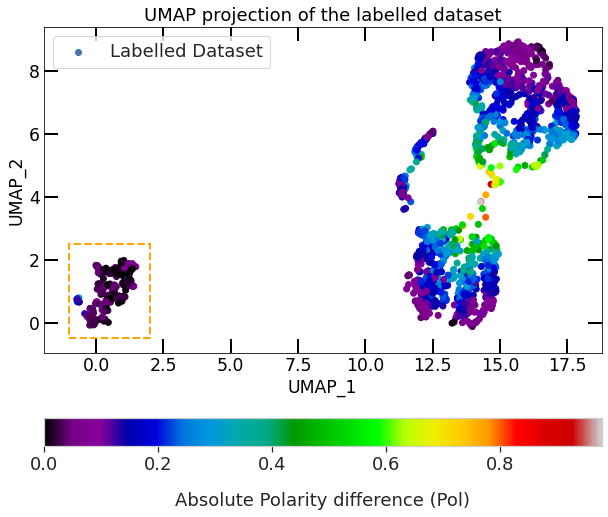

In [ ]:
import seaborn as sns
from matplotlib import rc
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.font_manager
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Rectangle

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid']=False


fig, ax = plt.subplots(figsize=(10,8))

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.axis(aspect='equal')
ax.set(adjustable='box')#, aspect='equal')
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.axis('on')

#fig = plt.figure()
#ax = fig.add_subplot(111)
sns.set(rc={'figure.figsize':(10 ,10)})
sns.set_style("whitegrid", {'axes.grid' : False})
# Create a Rectangle patch
rect = Rectangle((-1,-0.5),3,3, linewidth=2, edgecolor='orange', linestyle = '--' , facecolor='none')
ax.add_patch(rect)

s = ax.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c=  descr_diff('Si') , cmap=  'nipy_spectral' )  #newcmp)  'viridis_r') #'nipy_spectral'   descr_diff('Si')
##ax.scatter(pyr.emb1, pyr.emb2,  label='Pyrene Co-crystals', color='orange' )#,  c =kmeans.labels_, cmap='viridis')

##ax.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='green', label='(1)',  s=150)
##ax.scatter(embedding[-1:, 0], embedding[-1:, 1], color='red', label='(2)', s=150)

#s1=ax.scatter(embedding1[:, 0], embedding1[:, 1],   label= 'Unlabelled', c= uf_color , cmap='viridis' , alpha=1 )

cbar = plt.colorbar(s, ax=ax, orientation='horizontal', fraction=.1)
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_xaxis().labelpad = 18
cbar.ax.set_xlabel('Absolute Polarity difference (Pol)', fontsize=18, )
cbar.ax.tick_params(labelsize=18)
#cbar = plt.colorbar(s1, ax=ax, orientation='vertical', fraction=.1)

#ax.set_xlim(-1, 2)
#ax.set_ylim(-1, 2.5)
ax.tick_params(axis = 'both', which='both', width=2)
ax.tick_params(axis = 'both', which='major', length=14)
ax.tick_params(axis = 'both', which='minor', length=8, color='black')
ax.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)

plt.title('UMAP projection of the labelled dataset', fontsize=18);
plt.xlabel('UMAP_1')

ax.set_ylabel('UMAP_2')
plt.legend(prop={'size': 18})#, loc=(0.3, -0.47))
#plt.savefig('umap_.png',  rasterized=True,  bbox_inches="tight", dpi=600)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


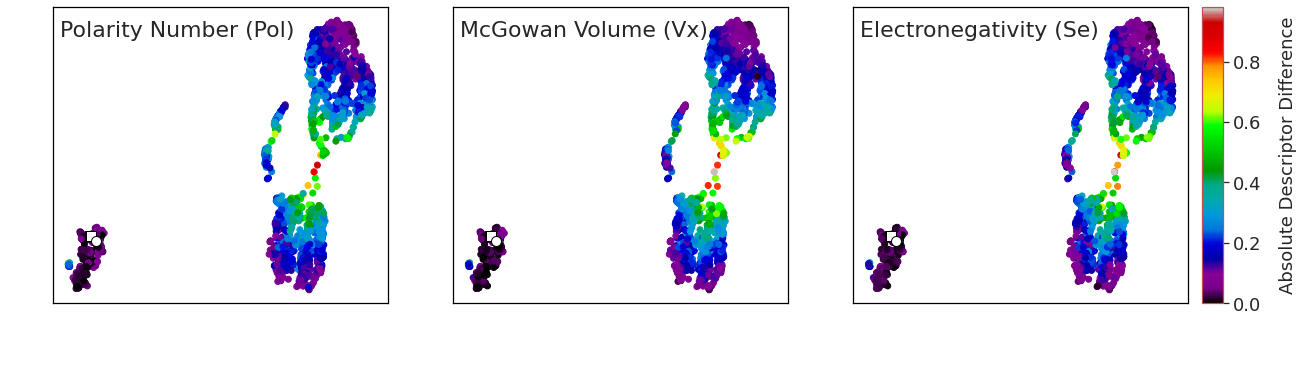

In [ ]:
import matplotlib.font_manager
from matplotlib import cm
from scipy.stats import gaussian_kde
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"


with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'}):
    fig, axes = plt.subplots(figsize=(18,5),nrows=1, ncols=3,constrained_layout=True)#, gridspec_kw = {'wspace':0.25, 'hspace':0.3})
    ax0, ax1, ax2= axes.flatten()


# Polarity
ax0.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('Pol') , cmap=  'nipy_spectral' ) 
ax0.text(0.02, 0.9, 'Polarity Number (Pol)', transform=ax0.transAxes, ha="left" ,fontsize=22)
ax0.axis(aspect='equal')
ax0.set(adjustable='box')#, aspect='equal')
ax0.grid(False)
ax0.set_facecolor('xkcd:white')
ax0.spines['bottom'].set_color('black')
ax0.spines['top'].set_color('black')
ax0.spines['right'].set_color('black')
ax0.spines['left'].set_color('black')
ax0.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='white', s=100, label='co-crystal 1',marker = 's', edgecolors='black')
ax0.scatter(embedding[-1:, 0], embedding[-1:, 1], color='white', s=100,marker = 'o', label='co-crystal 2',edgecolors='black') 
ax0.tick_params(axis = 'both', which='both', width=2, color='white')
ax0.set_xlabel("UMAP1",fontsize=20, color='white')
ax0.set_ylabel("UMAP2",fontsize=20, color='white')


#Volume
ax1.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('Vx') , cmap=  'nipy_spectral' ) 
ax1.text(0.02, 0.9, 'McGowan Volume (Vx)', 
        transform=ax1.transAxes, ha="left" ,fontsize=22)
ax1.axis(aspect='equal')
ax1.set(adjustable='box')#, aspect='equal')
ax1.grid(False)
ax1.set_facecolor('xkcd:white')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.axis('on')
ax1.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='white', s=100, label='co-crystal 1',marker = 's', edgecolors='black')
ax1.scatter(embedding[-1:, 0], embedding[-1:, 1], color='white', s=100,marker = 'o', label='co-crystal 2',edgecolors='black') 
ax1.tick_params(axis = 'both', which='both', width=2, color='white')
ax1.set_xlabel("UMAP1",fontsize=25, color='white')
ax1.set_ylabel("UMAP2",fontsize=25, color='white')

#Electronic
s=ax2.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('Se') , cmap=  'nipy_spectral' ) 
ax2.axis(aspect='equal')
ax2.set(adjustable='box')#, aspect='equal')
ax2.grid(False)
ax2.set_facecolor('xkcd:white')
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.axis('on')
ax2.text(0.02, 0.9, 'Electronegativity (Se)', transform=ax2.transAxes, ha="left" ,fontsize=22)

ax2.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='white', s=100, label='co-crystal 1',marker = 's', edgecolors='black')
ax2.scatter(embedding[-1:, 0], embedding[-1:, 1], color='white', s=100,marker = 'o', label='co-crystal 2',edgecolors='black')  
cbar = plt.colorbar(s, ax=ax2, orientation='vertical', fraction=.1, aspect=50)
#cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_yaxis().labelpad = 18
cbar.ax.set_ylabel('Absolute Descriptor Difference', rotation=90, fontsize=18)
cbar.ax.tick_params(labelsize=18)
ax2.tick_params(axis = 'both', which='both', width=2, color='white')
ax2.set_xlabel("UMAP1",fontsize=25, color='white')
ax2.set_ylabel("UMAP2",fontsize=25, color='white')



#fig.text(0.5, -0.05, 'UMAP_1', ha='center',fontsize=20 )
#fig.text(-0.02, 0.5, 'UMAP_2', va='center', rotation='vertical', fontsize=20)
#plt.legend( bbox_to_anchor= (0.73, 0.75), ncol=1, fontsize=20, facecolor='white', framealpha=1, edgecolor='black')
plt.savefig('figure9_unlab.png',rasterized=True,  bbox_inches="tight", dpi=600)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


Text(-0.02, 0.5, 'UMAP_2')

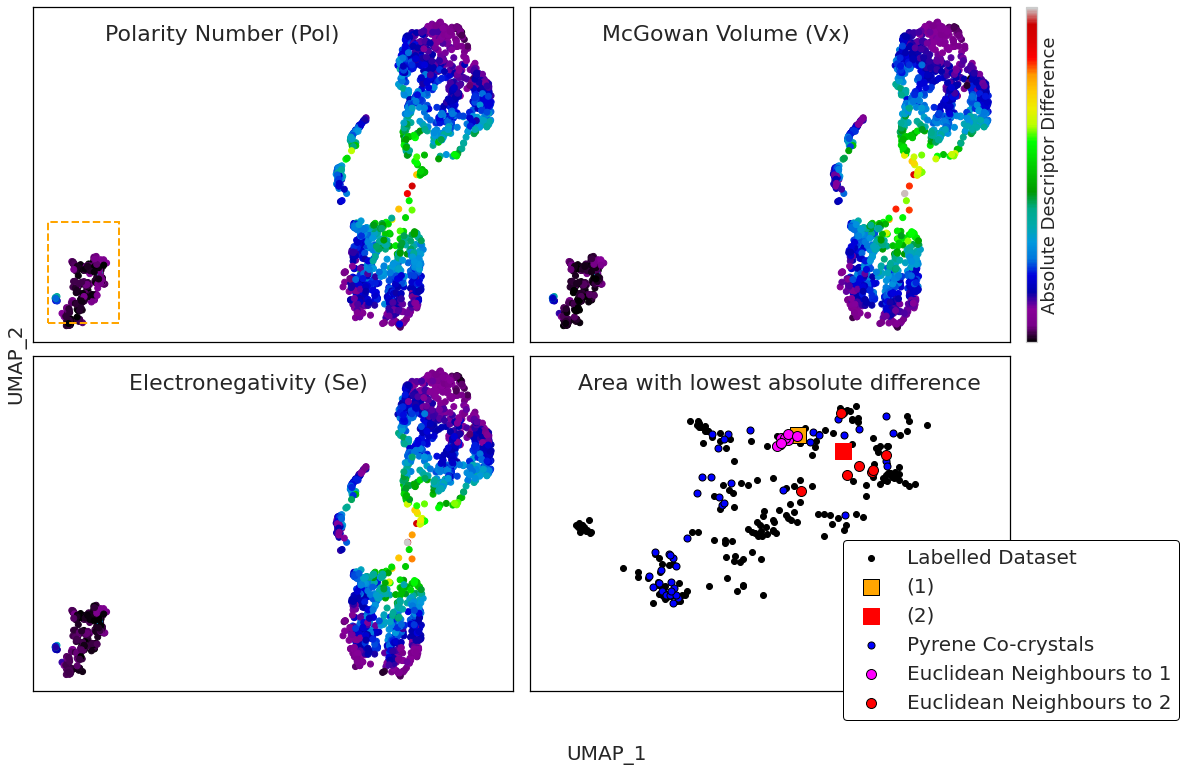

In [ ]:
import matplotlib.font_manager
from matplotlib import cm
from scipy.stats import gaussian_kde
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"
fig, axes = plt.subplots(figsize=(16,10),nrows=2, ncols=2,constrained_layout=True, gridspec_kw = {'wspace':0.05, 'hspace':0.1})
ax0, ax1, ax2, ax3= axes.flatten()

rect = Rectangle((-1,0),3,3, linewidth=2, edgecolor='orange', linestyle = '--' , facecolor='none')

# Polarity
ax0.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('Pol') , cmap=  'nipy_spectral' ) 
ax0.text(0.15, 0.9, 'Polarity Number (Pol)', transform=ax0.transAxes, ha="left" ,fontsize=22)
ax0.axis(aspect='equal')
ax0.set(adjustable='box')#, aspect='equal')
ax0.grid(False)
ax0.set_facecolor('xkcd:white')
ax0.spines['bottom'].set_color('black')
ax0.spines['top'].set_color('black')
ax0.spines['right'].set_color('black')
ax0.spines['left'].set_color('black')
ax0.axes.get_xaxis().set_visible(False)
ax0.axes.get_yaxis().set_visible(False)
ax0.add_patch(rect)

#Volume
s=ax1.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('Vx') , cmap=  'nipy_spectral' ) 
ax1.text(0.15, 0.9, 'McGowan Volume (Vx)', 
        transform=ax1.transAxes, ha="left" ,fontsize=22)
ax1.axis(aspect='equal')
ax1.set(adjustable='box')#, aspect='equal')
ax1.grid(False)
ax1.set_facecolor('xkcd:white')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.axis('on')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
cbar = plt.colorbar(s, ax=ax1, orientation='vertical', fraction=.1, aspect=50)
cbar.ax.get_yaxis().set_ticks([])
#cbar.ax.get_xaxis().labelpad = 18
cbar.ax.set_ylabel('Absolute Descriptor Difference', rotation=90, fontsize=18)
cbar.ax.tick_params(labelsize=18)
#ax1.add_patch(rect)

#Electronic
ax2.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('Se') , cmap=  'nipy_spectral' ) 
ax2.axis(aspect='equal')
ax2.set(adjustable='box')#, aspect='equal')
ax2.grid(False)
ax2.set_facecolor('xkcd:white')
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.axis('on')
ax2.text(0.2, 0.9, 'Electronegativity (Se)', transform=ax2.transAxes, ha="left" ,fontsize=22)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
#ax2.add_patch(rect)

#cbar = plt.colorbar(s, ax=ax2, orientation='vertical', fraction=.1, aspect=50)
#cbar.ax.get_yaxis().set_ticks([])
#cbar.ax.set_ylabel('Absolute Descriptor Difference', rotation=90, fontsize=18)
#cbar.ax.tick_params(labelsize=18)
ax3.set_xlim(-1, 2)
ax3.set_ylim(-1, 2.5)
ax3.axis(aspect='equal')
ax3.set(adjustable='box')#, aspect='equal')
ax3.grid(False)
ax3.set_facecolor('xkcd:white')
ax3.spines['bottom'].set_color('black')
ax3.spines['top'].set_color('black')
ax3.spines['right'].set_color('black')
ax3.spines['left'].set_color('black')
ax3.axis('on')
ax3.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c='black') 
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
ax3.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='orange', label='(1)', s=250, marker='s', edgecolor='black')
ax3.scatter(embedding[-1:, 0], embedding[-1:, 1], color='red', label='(2)', s=250, marker='s')
ax3.scatter(embedded[embedded.Identifier.isin(pyrene_cocrystals)].emb1 , embedded[embedded.Identifier.isin(pyrene_cocrystals)].emb2, color='blue', label='Pyrene Co-crystals',edgecolor='black',  s=50)
ax3.scatter(embedded[embedded.Identifier.isin(eucli_neighbours_1)].emb1 , embedded[embedded.Identifier.isin(eucli_neighbours_1)].emb2, color='magenta', label='Euclidean Neighbours to 1',edgecolor='black', s=100)
ax3.scatter(embedded[embedded.Identifier.isin(eucli_neighbours_2)].emb1 , embedded[embedded.Identifier.isin(eucli_neighbours_2)].emb2, color='red', label='Euclidean Neighbours to 2',edgecolor='black',  s=100)

ax3.text(0.1, 0.9, 'Area with lowest absolute difference', transform=ax3.transAxes, ha="left" ,fontsize=22)
ax3.legend( bbox_to_anchor= (0.63, 0.48), ncol=1, fontsize=20, facecolor='white', framealpha=1, edgecolor='black')

fig.text(0.5, -0.05, 'UMAP_1', ha='center',fontsize=20 )
fig.text(-0.02, 0.5, 'UMAP_2', va='center', rotation='vertical', fontsize=20)

#plt.savefig('figure9_unlab.png', dpi=600)

In [ ]:
import matplotlib.font_manager
from matplotlib import cm
from scipy.stats import gaussian_kde
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"

fig, ax = plt.subplots(figsize=(15,14))#,nrows=2, ncols=2,constrained_layout=True, gridspec_kw = {'wspace':0.05, 'hspace':0.1})

rect = Rectangle((-1,-0.7),3,3, linewidth=2, edgecolor='orange', linestyle = '--' , facecolor='none')

ax.set_xlim(-0.95, 1.6)
ax.set_ylim(-0.2, 2)
ax.axis(aspect='equal')
ax.set(adjustable='box')#, aspect='equal')
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.axis('on')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.scatter(embedded[~embedded.Identifier.isin(out)].emb1, embedded[~embedded.Identifier.isin(out)].emb2,   c='grey', s=100, alpha=0.5, edgecolor='black') 
ax.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='#9e003a', label= "co-crystal " + r"$\bf{" + str(1) + "}$", s=550, marker='s', edgecolor='black')
ax.scatter(embedding[-1:, 0], embedding[-1:, 1], color='#9e003a', label= "co-crystal " + r"$\bf{" + str(2) + "}$", s=550, marker='^',edgecolor='black')


ax.scatter(embedded[embedded.Identifier.isin(pyr_cocry)].emb1 , embedded[embedded.Identifier.isin(pyr_cocry)].emb2, color='#7af9ab',edgecolor='black',  s=250)  
ax.scatter(embedded[embedded.Identifier.isin(eucli_neighbours_1)].emb1 , embedded[embedded.Identifier.isin(eucli_neighbours_1)].emb2, color='grey' , edgecolor='black', marker = 's', s=150, alpha=0.7)
ax.scatter(embedded[embedded.Identifier.isin(pyr1)].emb1 , embedded[embedded.Identifier.isin(pyr1)].emb2, color='#7af9ab' , edgecolor='black', marker = 's', s=250, alpha=0.7)

ax.scatter(embedded[embedded.Identifier.isin(eucli_neighbours_2)].emb1 , embedded[embedded.Identifier.isin(eucli_neighbours_2)].emb2, color='grey'  edgecolor='black', marker = '^',  s=150, alpha=0.7)
ax.scatter(embedded[embedded.Identifier.isin(pyr2)].emb1 , embedded[embedded.Identifier.isin(pyr2)].emb2, color='#7af9ab' ,edgecolor='black', marker = '^',  s=250, alpha=0.7)


#ax.legend(bbox_to_anchor= (0.61, 0.4), fontsize=20, facecolor='white', framealpha=1, edgecolor='black')
sub_axes = ax.inset_axes([0.02, 0.63, .33, .33])
sub_axes.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('Se') , cmap=  'nipy_spectral' ) 
sub_axes.text(0.039, 0.8, ' UMAP projection of\nthe co-crystal space', transform=sub_axes.transAxes, ha="left" ,fontsize=18)
sub_axes.get_xaxis().set_visible(False)
sub_axes.get_yaxis().set_visible(False)
sub_axes.add_patch(rect)
sub_axes.spines['bottom'].set_color('black')
sub_axes.spines['top'].set_color('black')
sub_axes.spines['right'].set_color('black')
sub_axes.spines['left'].set_color('black')

from matplotlib.lines import Line2D
red_circle = Line2D([0], [0], marker='s', color='w', label='with pyrene', markeredgecolor = 'white',
                        markerfacecolor='#7af9ab', markersize=15)

grey_circle = Line2D([0], [0], marker='s', color='w', label='without pyrene', markeredgecolor = 'white',
                        markerfacecolor='grey', markersize=15, alpha=0.4)

k1= Line2D([0], [0], marker='o', color='w', label='further from ' + r"$\bf{" + str(1) + "}$ " + 'and ' + r"$\bf{" + str(2) + "}$", markeredgecolor = 'black',
                        markerfacecolor='white', markersize=10 , alpha=1)   

k2=  Line2D([0], [0], marker='s', color='w',  label= "co-crystal " + r"$\bf{" + str(1) + "}$", markerfacecolor='#9e003a', markersize=18 ,markeredgecolor = 'black', alpha=1)   

k3=  Line2D([0], [0], marker='^', color='w', label= "co-crystal " + r"$\bf{" + str(2) + "}$", markeredgecolor = 'black',
                        markerfacecolor='#9e003a', markersize=18 , alpha=1)  

k4=  Line2D([0], [0], marker='s', color='w',  label='euclidean neighbours to ' + r"$\bf{" + str(1) + "}$", markerfacecolor='white', markersize=12 ,markeredgecolor = 'black', alpha=1)   

k5=  Line2D([0], [0], marker='^', color='w', label='euclidean neighbours to ' + r"$\bf{" + str(2) + "}$", markeredgecolor = 'black',
                        markerfacecolor='white', markersize=12 , alpha=1)  


legend1 =ax.legend(handles=[k2, k3, k4, k5, k1],  bbox_to_anchor= (0.58, 0.235) , ncol=1, fontsize=20, facecolor='white', framealpha=0, edgecolor='black')  # bbox_to_anchor= (1.2, 0.65)

legend2 = ax.legend(handles=[red_circle,grey_circle],  bbox_to_anchor= (0.285, 0.15) , ncol=1, fontsize=20, facecolor='white', framealpha=0, edgecolor='black')  # bbox_to_anchor= (1.2, 0.65)

#legend1  = ax.legend(bbox_to_anchor= (0.605, 0.315), fontsize=20, facecolor='white', framealpha=1, edgecolor='black')

ax.add_artist(legend1)
ax.add_artist(legend2)

#fig.text(0.5, -0.05, 'UMAP_1', ha='center',fontsize=20)
#fig.text(-0.02, 0.5, 'UMAP_2', va='center', rotation='vertical', fontsize=20)

plt.savefig('test6.png', dpi=100)

SyntaxError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


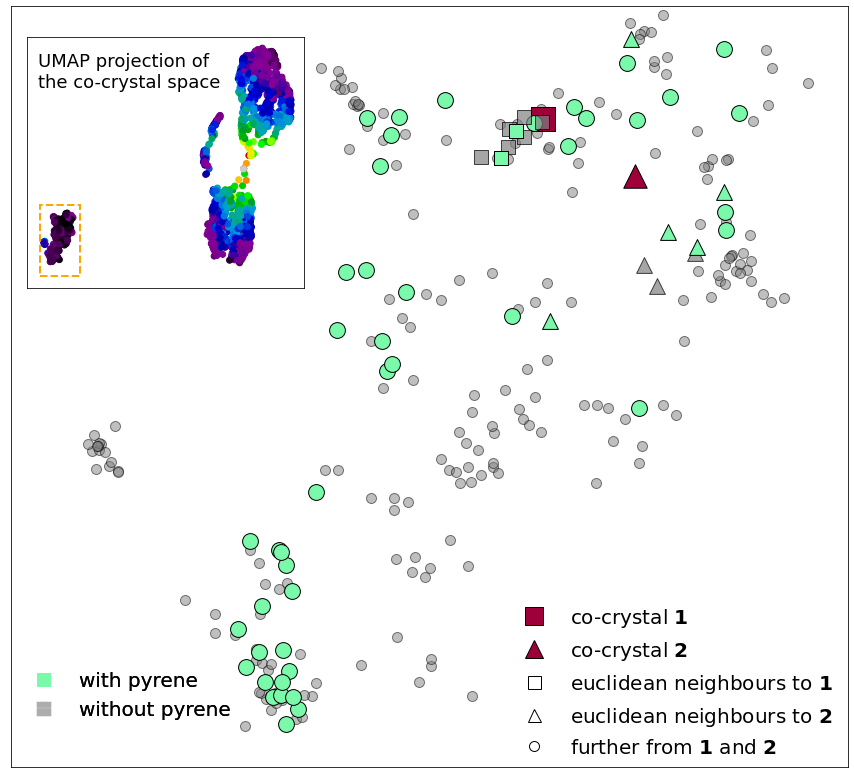

In [ ]:
import matplotlib.font_manager
from matplotlib import cm
from scipy.stats import gaussian_kde
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"

fig, ax = plt.subplots(figsize=(15,14))#,nrows=2, ncols=2,constrained_layout=True, gridspec_kw = {'wspace':0.05, 'hspace':0.1})

rect = Rectangle((-1,-0.7),3,3, linewidth=2, edgecolor='orange', linestyle = '--' , facecolor='none')

ax.set_xlim(-0.95, 1.6)
ax.set_ylim(-0.2, 2)
ax.axis(aspect='equal')
ax.set(adjustable='box')#, aspect='equal')
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.axis('on')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.scatter(embedded[~embedded.Identifier.isin(out)].emb1, embedded[~embedded.Identifier.isin(out)].emb2,   c='grey', s=100, alpha=0.5, edgecolor='black') 
ax.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='#9e003a', label= "co-crystal " + r"$\bf{" + str(1) + "}$", s=550, marker='s', edgecolor='black')
ax.scatter(embedding[-1:, 0], embedding[-1:, 1], color='#9e003a', label= "co-crystal " + r"$\bf{" + str(2) + "}$", s=550, marker='^',edgecolor='black')


ax.scatter(embedded[embedded.Identifier.isin(pyr_cocry)].emb1 , embedded[embedded.Identifier.isin(pyr_cocry)].emb2, color='#7af9ab',edgecolor='black',  s=250)  
#ax.scatter(embedded[embedded.Identifier.isin(eucli_neighbours_1)].emb1 , embedded[embedded.Identifier.isin(eucli_neighbours_1)].emb2, color='grey' , edgecolor='black', marker = 's', s=150, alpha=0.7)
ax.scatter(embedded[embedded.Identifier.isin([x for x in eucli_neighbours_1 if x not in pyr1])].emb1 , embedded[embedded.Identifier.isin([x for x in eucli_neighbours_1 if x not in pyr1])].emb2, color='grey' ,edgecolor='black', marker = 's',  s=200, alpha=0.7)
ax.scatter(embedded[embedded.Identifier.isin(pyr1)].emb1 , embedded[embedded.Identifier.isin(pyr1)].emb2, color='#7af9ab' , edgecolor='black', marker = 's', s=200, alpha=1)

ax.scatter(embedded[embedded.Identifier.isin([x for x in eucli_neighbours_2 if x not in pyr2])].emb1 , embedded[embedded.Identifier.isin([x for x in eucli_neighbours_2 if x not in pyr2])].emb2, color='grey' ,edgecolor='black', marker = '^',  s=250, alpha=0.7)
ax.scatter(embedded[embedded.Identifier.isin(pyr2)].emb1 , embedded[embedded.Identifier.isin(pyr2)].emb2, color='#7af9ab' ,edgecolor='black', marker = '^',  s=250, alpha=1)


#ax.legend(bbox_to_anchor= (0.61, 0.4), fontsize=20, facecolor='white', framealpha=1, edgecolor='black')
sub_axes = ax.inset_axes([0.02, 0.63, .33, .33])
sub_axes.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('Se') , cmap=  'nipy_spectral' ) 
sub_axes.text(0.039, 0.8, 'UMAP projection of\nthe co-crystal space', transform=sub_axes.transAxes, ha="left" ,fontsize=18)
sub_axes.get_xaxis().set_visible(False)
sub_axes.get_yaxis().set_visible(False)
sub_axes.add_patch(rect)
sub_axes.spines['bottom'].set_color('black')
sub_axes.spines['top'].set_color('black')
sub_axes.spines['right'].set_color('black')
sub_axes.spines['left'].set_color('black')

from matplotlib.lines import Line2D
red_circle = Line2D([0], [0], marker='s', color='w', label='with pyrene', markeredgecolor = 'white',
                        markerfacecolor='#7af9ab', markersize=15)

grey_circle = Line2D([0], [0], marker='s', color='w', label='without pyrene', markeredgecolor = 'white',
                        markerfacecolor='grey', markersize=15, alpha=0.4)

k1= Line2D([0], [0], marker='o', color='w', label='further from ' + r"$\bf{" + str(1) + "}$ " + 'and ' + r"$\bf{" + str(2) + "}$", markeredgecolor = 'black',
                        markerfacecolor='white', markersize=10 , alpha=1)   

k2=  Line2D([0], [0], marker='s', color='w',  label= "co-crystal " + r"$\bf{" + str(1) + "}$", markerfacecolor='#9e003a', markersize=18 ,markeredgecolor = 'black', alpha=1)   

k3=  Line2D([0], [0], marker='^', color='w', label= "co-crystal " + r"$\bf{" + str(2) + "}$", markeredgecolor = 'black',
                        markerfacecolor='#9e003a', markersize=18 , alpha=1)  

k4=  Line2D([0], [0], marker='s', color='w',  label='euclidean neighbours to ' + r"$\bf{" + str(1) + "}$", markerfacecolor='white', markersize=13 ,markeredgecolor = 'black', alpha=1)   

k5=  Line2D([0], [0], marker='^', color='w', label='euclidean neighbours to ' + r"$\bf{" + str(2) + "}$", markeredgecolor = 'black',
                        markerfacecolor='white', markersize=13 , alpha=1)  


legend1 =ax.legend(handles=[k2, k3, k4, k5, k1],  bbox_to_anchor= (0.58, 0.235) , ncol=1, fontsize=20, facecolor='white', framealpha=0, edgecolor='black')  # bbox_to_anchor= (1.2, 0.65)

legend2 = ax.legend(handles=[red_circle,grey_circle],  bbox_to_anchor= (0.285, 0.15) , ncol=1, fontsize=20, facecolor='white', framealpha=0, edgecolor='black')  # bbox_to_anchor= (1.2, 0.65)

#legend1  = ax.legend(bbox_to_anchor= (0.605, 0.315), fontsize=20, facecolor='white', framealpha=1, edgecolor='black')

ax.add_artist(legend1)
ax.add_artist(legend2)

#fig.text(0.5, -0.05, 'UMAP_1', ha='center',fontsize=20)
#fig.text(-0.02, 0.5, 'UMAP_2', va='center', rotation='vertical', fontsize=20)

plt.savefig('test8.png', dpi=600)

In [26]:
pyr1 = [x for x in pyrene_cocrystals if x in eucli_neighbours_1]
pyr2 = [x for x in pyrene_cocrystals if x in eucli_neighbours_2]

pyr_cocry = [x for x in pyrene_cocrystals if x not in pyr1 if x not in pyr2]
out = eucli_neighbours_1 + eucli_neighbours_2 + list(pyrene_cocrystals)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


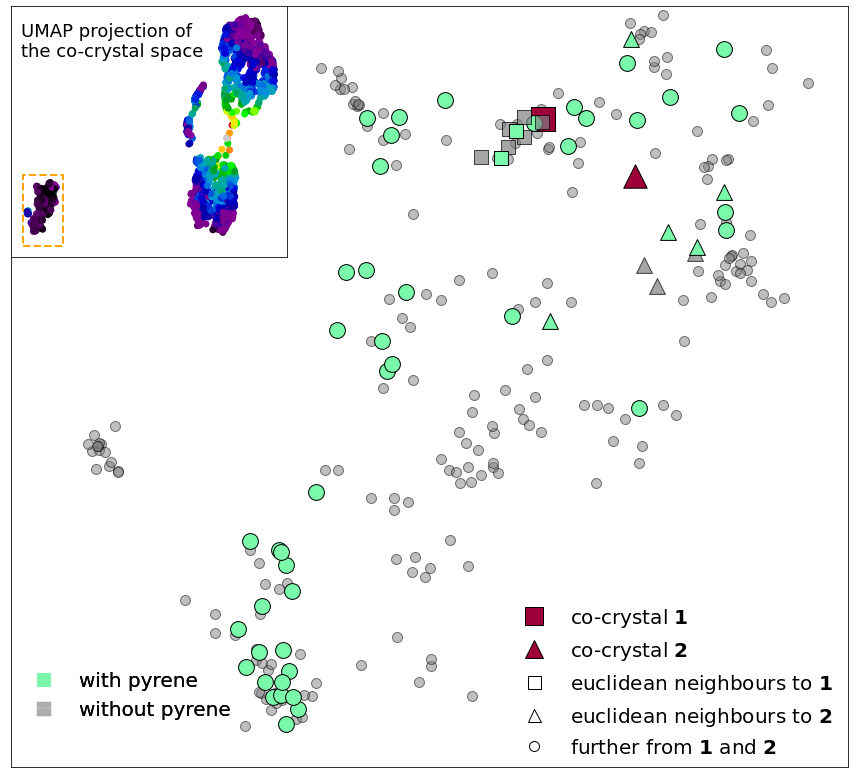

In [34]:
import matplotlib.font_manager
from matplotlib import cm
from scipy.stats import gaussian_kde
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"

fig, ax = plt.subplots(figsize=(15,14))#,nrows=2, ncols=2,constrained_layout=True, gridspec_kw = {'wspace':0.05, 'hspace':0.1})

rect = Rectangle((-1,-0.7),3,3, linewidth=2, edgecolor='orange', linestyle = '--' , facecolor='none')

ax.set_xlim(-0.95, 1.6)
ax.set_ylim(-0.2, 2)
ax.axis(aspect='equal')
ax.set(adjustable='box')#, aspect='equal')
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.axis('on')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.scatter(embedded[~embedded.Identifier.isin(out)].emb1, embedded[~embedded.Identifier.isin(out)].emb2,   c='grey', s=100, alpha=0.5, edgecolor='black') 
ax.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='#9e003a', label= "co-crystal " + r"$\bf{" + str(1) + "}$", s=550, marker='s', edgecolor='black')
ax.scatter(embedding[-1:, 0], embedding[-1:, 1], color='#9e003a', label= "co-crystal " + r"$\bf{" + str(2) + "}$", s=550, marker='^',edgecolor='black')


ax.scatter(embedded[embedded.Identifier.isin(pyr_cocry)].emb1 , embedded[embedded.Identifier.isin(pyr_cocry)].emb2, color='#7af9ab',edgecolor='black',  s=250)  
#ax.scatter(embedded[embedded.Identifier.isin(eucli_neighbours_1)].emb1 , embedded[embedded.Identifier.isin(eucli_neighbours_1)].emb2, color='grey' , edgecolor='black', marker = 's', s=150, alpha=0.7)
ax.scatter(embedded[embedded.Identifier.isin([x for x in eucli_neighbours_1 if x not in pyr1])].emb1 , embedded[embedded.Identifier.isin([x for x in eucli_neighbours_1 if x not in pyr1])].emb2, color='grey' ,edgecolor='black', marker = 's',  s=200, alpha=0.7)
ax.scatter(embedded[embedded.Identifier.isin(pyr1)].emb1 , embedded[embedded.Identifier.isin(pyr1)].emb2, color='#7af9ab' , edgecolor='black', marker = 's', s=200, alpha=1)

ax.scatter(embedded[embedded.Identifier.isin([x for x in eucli_neighbours_2 if x not in pyr2])].emb1 , embedded[embedded.Identifier.isin([x for x in eucli_neighbours_2 if x not in pyr2])].emb2, color='grey' ,edgecolor='black', marker = '^',  s=250, alpha=0.7)
ax.scatter(embedded[embedded.Identifier.isin(pyr2)].emb1 , embedded[embedded.Identifier.isin(pyr2)].emb2, color='#7af9ab' ,edgecolor='black', marker = '^',  s=250, alpha=1)



sub_axes = ax.inset_axes([0.0, 0.67, .33, .33])
sub_axes.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= descr_diff('Se') , cmap=  'nipy_spectral' ) 
sub_axes.text(0.039, 0.8, 'UMAP projection of\nthe co-crystal space', transform=sub_axes.transAxes, ha="left" ,fontsize=18)
sub_axes.get_xaxis().set_visible(False)
sub_axes.get_yaxis().set_visible(False)
sub_axes.add_patch(rect)
sub_axes.spines['bottom'].set_color('black')
sub_axes.spines['top'].set_color('black')
sub_axes.spines['right'].set_color('black')
sub_axes.spines['left'].set_color('black')

from matplotlib.lines import Line2D
red_circle = Line2D([0], [0], marker='s', color='w', label='with pyrene', markeredgecolor = 'white',
                        markerfacecolor='#7af9ab', markersize=15)

grey_circle = Line2D([0], [0], marker='s', color='w', label='without pyrene', markeredgecolor = 'white',
                        markerfacecolor='grey', markersize=15, alpha=0.4)

k1= Line2D([0], [0], marker='o', color='w', label='further from ' + r"$\bf{" + str(1) + "}$ " + 'and ' + r"$\bf{" + str(2) + "}$", markeredgecolor = 'black',
                        markerfacecolor='white', markersize=10 , alpha=1)   

k2=  Line2D([0], [0], marker='s', color='w',  label= "co-crystal " + r"$\bf{" + str(1) + "}$", markerfacecolor='#9e003a', markersize=18 ,markeredgecolor = 'black', alpha=1)   

k3=  Line2D([0], [0], marker='^', color='w', label= "co-crystal " + r"$\bf{" + str(2) + "}$", markeredgecolor = 'black',
                        markerfacecolor='#9e003a', markersize=18 , alpha=1)  

k4=  Line2D([0], [0], marker='s', color='w',  label='euclidean neighbours to ' + r"$\bf{" + str(1) + "}$", markerfacecolor='white', markersize=13 ,markeredgecolor = 'black', alpha=1)   

k5=  Line2D([0], [0], marker='^', color='w', label='euclidean neighbours to ' + r"$\bf{" + str(2) + "}$", markeredgecolor = 'black',
                        markerfacecolor='white', markersize=13 , alpha=1)  


legend1 =ax.legend(handles=[k2, k3, k4, k5, k1],  bbox_to_anchor= (0.58, 0.235) , ncol=1, fontsize=20, facecolor='white', framealpha=0, edgecolor='black')  # bbox_to_anchor= (1.2, 0.65)

legend2 = ax.legend(handles=[red_circle,grey_circle],  bbox_to_anchor= (0.285, 0.15) , ncol=1, fontsize=20, facecolor='white', framealpha=0, edgecolor='black')  # bbox_to_anchor= (1.2, 0.65)

#legend1  = ax.legend(bbox_to_anchor= (0.605, 0.315), fontsize=20, facecolor='white', framealpha=1, edgecolor='black')

ax.add_artist(legend1)
ax.add_artist(legend2)

#fig.text(0.5, -0.05, 'UMAP_1', ha='center',fontsize=20)
#fig.text(-0.02, 0.5, 'UMAP_2', va='center', rotation='vertical', fontsize=20)

plt.savefig('test8.png', rasterized=True,  bbox_inches="tight", dpi=600)

In [ ]:
ax.scatter(embedded[~embedded.Identifier.isin(out)].emb1, embedded[~embedded.Identifier.isin(pyrene_cocrystals)].emb2,   c='grey', s=100, alpha=0.5, edgecolor='black') 

In [ ]:
df_all1= df_all[df_all.Identifier.isin(dfn.id.values)]

In [ ]:
mw_color = (df_all1['MW'].iloc[:, 0] - df_all1['MW'].iloc[:, 1]).abs()
mw_color

0       0.504285
2       0.162111
5       0.003820
6       0.222232
8       0.032870
          ...   
1717    0.441333
1718    0.384888
1719    0.462076
1720    0.081594
1721    0.188593
Name: MW, Length: 1627, dtype: float64

In [ ]:
import seaborn as sns
from matplotlib import rc
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.font_manager
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid']=False


fig, ax = plt.subplots(figsize=(10,8))

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.axis(aspect='equal')
ax.set(adjustable='box')#, aspect='equal')
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.axis('on')

#fig = plt.figure()
#ax = fig.add_subplot(111)
sns.set(rc={'figure.figsize':(10 ,10)})
sns.set_style("whitegrid", {'axes.grid' : False})


s = ax.scatter(dfn.emb1,dfn.emb2,  label='Labelled Dataset' ,  c= mw_color , cmap= 'viridis_r')#  'nipy_spectral'    )#newcmp)
##ax.scatter(pyr.emb1, pyr.emb2,  label='Pyrene Co-crystals', color='orange' )#,  c =kmeans.labels_, cmap='viridis')

##ax.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='green', label='(1)',  s=150)
##ax.scatter(embedding[-1:, 0], embedding[-1:, 1], color='red', label='(2)', s=150)

#s1=ax.scatter(embedding1[:, 0], embedding1[:, 1],   label= 'Unlabelled', c= uf_color , cmap='viridis' , alpha=1 )

cbar = plt.colorbar(s, ax=ax, orientation='horizontal', fraction=.1)
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_xaxis().labelpad = 18
cbar.ax.set_xlabel('Absolute Molecular Weight difference (MW)', fontsize=18)

#cbar = plt.colorbar(s1, ax=ax, orientation='vertical', fraction=.1)

#ax.set_xlim(-1, 2)
#ax.set_ylim(-1, 2.5)
ax.tick_params(axis = 'both', which='both', width=2)
ax.tick_params(axis = 'both', which='major', length=14)
ax.tick_params(axis = 'both', which='minor', length=8, color='black')
ax.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
#major_ticks_x = np.arange(0, 25, 10)
#minor_ticks_x = np.arange(0, 25,5)
#major_ticks_y = np.arange(0,25, 10)
#minor_ticks_y = np.arange(0, 25, 5)
#ax.set_xticks(major_ticks_x)
#ax.set_xticks(minor_ticks_x, minor=True)
#ax.set_yticks(major_ticks_y)
#ax.set_yticks(minor_ticks_y, minor=True)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('UMAP projection of the labelled dataset', fontsize=18);
plt.xlabel('UMAP_1')

ax.set_ylabel('UMAP_2')
plt.legend(prop={'size': 18})#, loc=(0.3, -0.47))
#plt.savefig('umap_.png',  rasterized=True,  bbox_inches="tight", dpi=600)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


NameError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa9c0991620> (for post_execute):


RuntimeError: ignored

RuntimeError: ignored

<Figure size 720x576 with 1 Axes>

In [ ]:
df_all.to_csv('/content/drive/My Drive/cocrystal_design/data/reduced_labelled_to_test.csv')


In [ ]:
lab_deep = pd.read_csv('/content/drive/My Drive/cocrystal_design/data/labelled_deep.csv')
unlab_deep = pd.read_csv('/content/drive/My Drive/cocrystal_design/data/unlabelled_deep.csv')
unlab_deep[unlab_deep<0] =0

In [ ]:
uf_color = (uf_final['MW_1'] - uf_final['MW_2']).abs()
uf_color

0        0.002183
1        0.007354
2        0.016151
3        0.024948
4        0.029314
           ...   
21731    0.009174
21732    0.037770
21733    0.031386
21734    0.078331
21735    0.046944
Length: 21736, dtype: float64

In [ ]:
lab_score = pd.concat([pd.DataFrame(df_all.Identifier.values, columns=['id']),pd.DataFrame(embedding[:, 0], columns=['emb1']), pd.DataFrame(embedding[:, 1],columns=['emb2']) , pd.DataFrame(lab_deep.train_score.values[:], columns=['score'])], axis=1)
dfn=lab_score[lab_score.score > 0.6]
dfn

,id,emb1,emb2,score
0,WOVMEB,14.458632,2.042519,0.703429
2,OTIHIJ,16.058878,6.435202,0.934342
5,NAQVOT,0.135389,1.655062,0.612997
6,TUYRUB,12.075418,2.808096,0.700544
8,FLABPC,0.184953,1.614048,0.846324
...,...,...,...,...
1717,AFOTIB,13.302301,2.342727,0.815359
1718,CIQNIC,14.859313,2.438497,0.901684
1719,DIVZUG,13.270300,2.457156,0.770530
1720,PIQTOB,13.936823,-0.034264,0.647681


In [ ]:
unlab_score = pd.concat([pd.DataFrame(uf_final.Identifier.values, columns=['id']),pd.DataFrame(embedding1[:, 0], columns=['emb1']), pd.DataFrame(embedding1[:, 1],columns=['emb2']) , pd.DataFrame(unlab_deep.test_score.values[:], columns=['score'])], axis=1)
unlab_score 

NameError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


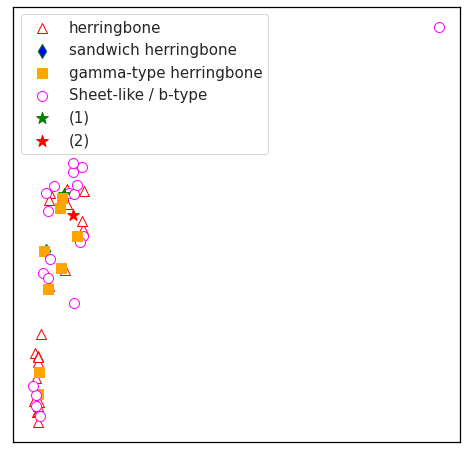

In [ ]:
import seaborn as sns
from matplotlib import rc
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.font_manager
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid']=False


fig, ax = plt.subplots(figsize=(8,8))

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.axis(aspect='equal')
ax.set(adjustable='box')#, aspect='equal')
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.axis('on')

#fig = plt.figure()
#ax = fig.add_subplot(111)
sns.set(rc={'figure.figsize':(10 ,10)})
sns.set_style("whitegrid", {'axes.grid' : False})

ax.scatter(pyr.emb1[pyr.pack ==1], pyr.emb2[pyr.pack ==1], s=100, marker = '^', color='white', edgecolors='red', label='herringbone')#,  c=y, cmap='viridis') #label='Pyrene Co-crystals' ,
ax.scatter(pyr.emb1[pyr.pack ==2], pyr.emb2[pyr.pack ==2], s=100, marker = 'd', color='blue', edgecolors='green', label='sandwich herringbone')
ax.scatter(pyr.emb1[pyr.pack ==3], pyr.emb2[pyr.pack ==3], s=100, marker = 's', color='orange', edgecolors='orange', label='gamma-type herringbone')
ax.scatter(pyr.emb1[pyr.pack ==4], pyr.emb2[pyr.pack ==4], s=100, marker = 'o', color='white', edgecolors='magenta', label='Sheet-like / b-type')

#ax.scatter(embedding[:, 0], embedding[:, 1], s=100,  label='Labelled Dataset',color='blue')#  c =kmeans.labels_)
ax.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='green', label='(1)', s=150, marker='*')
ax.scatter(embedding[-1:, 0], embedding[-1:, 1], color='red', label='(2)', s=150, marker='*')
ax.scatter(pyr[pyr.Identifier=='PYRPMA11'].emb1, pyr[pyr.Identifier=='PYRPMA11'].emb2 ,s=100, marker = 's', color='orange', edgecolors='orange')#, label='gamma-type herringbone')
ax.scatter(pyr[pyr.Identifier=='PYRTCQ03'].emb1, pyr[pyr.Identifier=='PYRTCQ03'].emb2 ,s=100, marker = 's', color='orange', edgecolors='orange')#, label='gamma-type herringbone')
#ax.set_xlim(-1, 4)
#ax.set_ylim(0, 10)
#ax.tick_params(axis = 'both', which='both', width=2)
#ax.tick_params(axis = 'both', which='major', length=14)
#ax.tick_params(axis = 'both', which='minor', length=8, color='black')
#ax.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
#major_ticks_x = np.arange(-50, -40, 40)
#minor_ticks_x = np.arange(-50, -40, 20)
#major_ticks_y = np.arange(-50, -40, 40)
#minor_ticks_y = np.arange(-50, -4, 20)
#ax.set_xticks(major_ticks_x)
#ax.set_xticks(minor_ticks_x, minor=True)
#ax.set_yticks(major_ticks_y)
#ax.set_yticks(minor_ticks_y, minor=True)
plt.legend(prop={'size': 15})#, loc='upper left', edgecolor='black')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
#plt.savefig('umap_eucl_small.svg', dpi=600)

In [ ]:
#Visualization with tsne
import numpy as np
from sklearn.manifold import TSNE

embedding = TSNE(n_components=2, random_state=1, metric='euclidean').fit_transform(df_all.iloc[:,1:])  #df_mw.iloc[:,1:]  )#, learning_rate=200.0, n_iter=2000, n_iter_without_progress=300, min_grad_norm=1e-07


In [ ]:
dist_mat_tsne = squareform(pdist(embedding))

In [ ]:
#dist_mat = squareform(pdist(euclidean_dist.iloc[:, 1:]))

In [ ]:
pearson = np.corrcoef(dist_mat.flatten() ,dist_mat_tsne.flatten())
print(pearson[1,0])

0.516390401125625


In [ ]:
#pyrene = pd.concat([pd.DataFrame(df_all.Identifier.values, columns=['Identifier']), pd.DataFrame(embedding[:, 0],columns=['emb1']), pd.DataFrame(embedding[:, 1],columns=['emb2']), pd.DataFrame(embedding[:, 1],columns=['emb3']) ], axis=1)
embedded = pd.concat([pd.DataFrame(df_all.Identifier.values, columns=['Identifier']), pd.DataFrame(embedding[:, 0],columns=['emb1']), pd.DataFrame(embedding[:, 1],columns=['emb2']) ], axis=1)
pyr = embedded[embedded.Identifier.isin(pyrene_cocrystals)] #packing.Identifier.values)]
pyr = pd.concat([pd.DataFrame(pyr.values, columns=pyr.columns.values), pd.DataFrame(y, columns=['pack'])], axis=1)

In [ ]:
mw_color = (df_all['Pol'].iloc[:, 0] - df_all['Pol'].iloc[:, 1]).abs()
mw_color

0       0.366197
1       0.077465
2       0.166667
3       0.185446
4       0.014085
          ...   
1719    0.448357
1720    0.192495
1721    0.091549
1722    0.011737
1723    0.007042
Name: Pol, Length: 1724, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


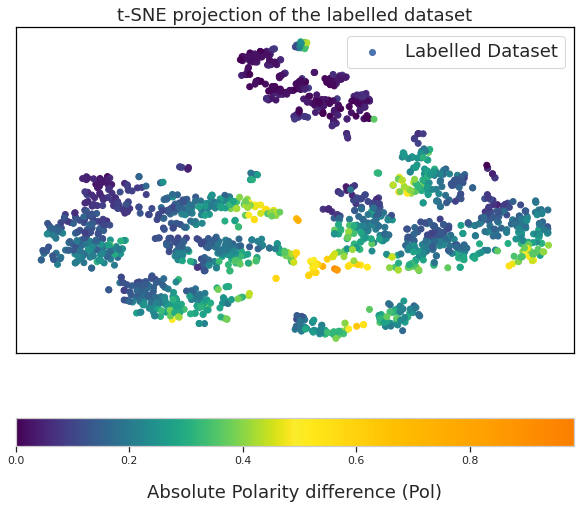

In [ ]:
import seaborn as sns
from matplotlib import rc
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.font_manager
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid']=False


fig, ax = plt.subplots(figsize=(10,8))

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.axis(aspect='equal')
ax.set(adjustable='box')#, aspect='equal')
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.axis('on')

#fig = plt.figure()
#ax = fig.add_subplot(111)
sns.set(rc={'figure.figsize':(10 ,10)})
sns.set_style("whitegrid", {'axes.grid' : False})


s = ax.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset' ,  c= mw_color , cmap=newcmp)
##ax.scatter(pyr.emb1, pyr.emb2,  label='Pyrene Co-crystals', color='orange' )#,  c =kmeans.labels_, cmap='viridis')

##ax.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='green', label='(1)',  s=150)
##ax.scatter(embedding[-1:, 0], embedding[-1:, 1], color='red', label='(2)', s=150)


cbar = plt.colorbar(s, ax=ax, orientation='horizontal', fraction=.1)
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_xaxis().labelpad = 18
cbar.ax.set_xlabel('Absolute Polarity difference (Pol)', fontsize=18)


#ax.set_xlim(-1, 2)
#ax.set_ylim(-1, 2.5)
ax.tick_params(axis = 'both', which='both', width=2)
ax.tick_params(axis = 'both', which='major', length=14)
ax.tick_params(axis = 'both', which='minor', length=8, color='black')
ax.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
#major_ticks_x = np.arange(0, 25, 10)
#minor_ticks_x = np.arange(0, 25,5)
#major_ticks_y = np.arange(0,25, 10)
#minor_ticks_y = np.arange(0, 25, 5)
#ax.set_xticks(major_ticks_x)
#ax.set_xticks(minor_ticks_x, minor=True)
#ax.set_yticks(major_ticks_y)
#ax.set_yticks(minor_ticks_y, minor=True)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('t-SNE projection of the labelled dataset', fontsize=18);
plt.xlabel('t-SNE_1')

ax.set_ylabel('t-SNE_2')
plt.legend(prop={'size': 18})#, loc=(0.3, -0.47))
plt.savefig('tsne_1.png',  rasterized=True,  bbox_inches="tight", dpi=600)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


NameError: ignored

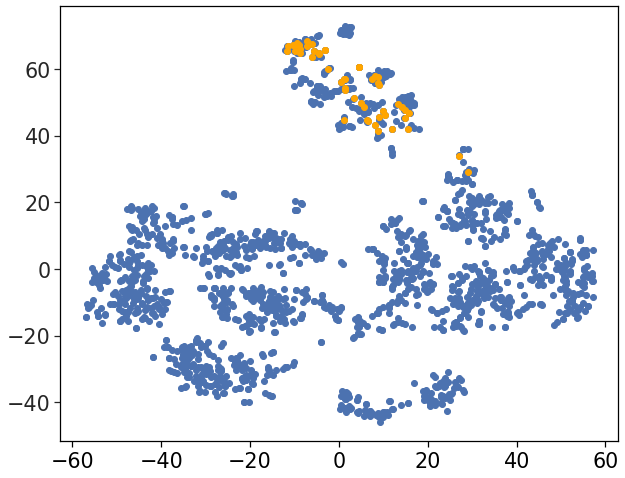

In [ ]:
import seaborn as sns
from matplotlib import rc
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.font_manager
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid']=False


fig, ax = plt.subplots(figsize=(10,8))

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.axis(aspect='equal')
ax.set(adjustable='box')#, aspect='equal')
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.axis('on')

#fig = plt.figure()
#ax = fig.add_subplot(111)
sns.set(rc={'figure.figsize':(10 ,10)})
sns.set_style("whitegrid", {'axes.grid' : False})


ax.scatter(embedding[:, 0], embedding[:, 1],  label='Labelled Dataset')# ,  c= y , cmap='viridis')
ax.scatter(pyr.emb1, pyr.emb2,  label='Pyrene Co-crystals', color='orange' )#,  c =kmeans.labels_, cmap='viridis')
ax.scatter(per.emb1, per.emb2,  label='Perylene Co-crystals', color='magenta')
ax.scatter(triphe.emb1, triphe.emb2,  label='Triphenylene Co-crystals', color='yellow')
ax.scatter(picene.emb1, picene.emb2,  label='Picene Co-crystals', color='red')
ax.scatter(fluant.emb1, fluant.emb2,  label='Fluant Co-crystals', color='grey')
ax.scatter(phenan.emb1, phenan.emb2,  label='Phenan Co-crystals', color='black')
ax.scatter(benzophenan.emb1, benzophenan.emb2,  label='Benzophenan Co-crystals', color='magenta')


#ax.scatter(embedding1[:, 0], embedding1[:, 1],   label= 'Unlabelled',color='yellow')#, c=unlab_deep.test_score,cmap='viridis' )
#ax.scatter(unlab_score.emb1[unlab_score.score > 0.7], unlab_score.emb2[unlab_score.score > 0.7],alpha=0.5,   label= 'Inliers/Unlabelled', color='lightgreen')
ax.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='green', label='(1)',  s=150)
ax.scatter(embedding[-1:, 0], embedding[-1:, 1], color='red', label='(2)', s=150)

#plt.colorbar(shrink=1)

#sns.scatterplot(embedding[1:1722, 0], embedding[1:1722, 1], color='orange', label='Known Dataset')#, alpha=0.08)

#sns.scatterplot(embedding[1722:, 0], embedding[1722:, 1], color='g', label='Unknown Dataset', alpha=0.09)
#sns.scatterplot(embedding1[:, 0], embedding1[:, 1], color='g', alpha=0.8, label='Unnown Dataset')
#plt.gca().set_aspect('equal', 'datalim')

ax.set_xlim(-20, 20)
ax.set_ylim(30, 80)
ax.tick_params(axis = 'both', which='both', width=2)
ax.tick_params(axis = 'both', which='major', length=14)
ax.tick_params(axis = 'both', which='minor', length=8, color='black')
ax.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
#major_ticks_x = np.arange(0, 25, 10)
#minor_ticks_x = np.arange(0, 25,5)
#major_ticks_y = np.arange(0,25, 10)
#minor_ticks_y = np.arange(0, 25, 5)
#ax.set_xticks(major_ticks_x)
#ax.set_xticks(minor_ticks_x, minor=True)
#ax.set_yticks(major_ticks_y)
#ax.set_yticks(minor_ticks_y, minor=True)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('t-SNE projection of the orange dashed area', fontsize=18);
plt.xlabel('UMAP_1')

ax.set_ylabel('UMAP_2')
plt.legend(prop={'size': 18}, loc=(0.1, -0.47), edgecolor='black')
plt.savefig('tsne_eucl_zoom.png',  rasterized=True,  bbox_inches="tight", dpi=600)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


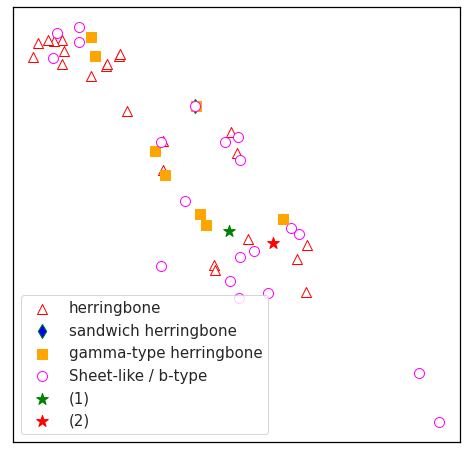

In [ ]:
import seaborn as sns
from matplotlib import rc
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.font_manager
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid']=False


fig, ax = plt.subplots(figsize=(8,8))

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.axis(aspect='equal')
ax.set(adjustable='box')#, aspect='equal')
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.axis('on')

#fig = plt.figure()
#ax = fig.add_subplot(111)
sns.set(rc={'figure.figsize':(10 ,10)})
sns.set_style("whitegrid", {'axes.grid' : False})

ax.scatter(pyr.emb1[pyr.pack ==1], pyr.emb2[pyr.pack ==1], s=100, marker = '^', color='white', edgecolors='red', label='herringbone')#,  c=y, cmap='viridis') #label='Pyrene Co-crystals' ,
ax.scatter(pyr.emb1[pyr.pack ==2], pyr.emb2[pyr.pack ==2], s=100, marker = 'd', color='blue', edgecolors='green', label='sandwich herringbone')
ax.scatter(pyr.emb1[pyr.pack ==3], pyr.emb2[pyr.pack ==3], s=100, marker = 's', color='orange', edgecolors='orange', label='gamma-type herringbone')
ax.scatter(pyr.emb1[pyr.pack ==4], pyr.emb2[pyr.pack ==4], s=100, marker = 'o', color='white', edgecolors='magenta', label='Sheet-like / b-type')

#ax.scatter(embedding[:, 0], embedding[:, 1], s=100,  label='Labelled Dataset',color='blue')#  c =kmeans.labels_)
ax.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='green', label='(1)', s=150, marker='*')
ax.scatter(embedding[-1:, 0], embedding[-1:, 1], color='red', label='(2)', s=150, marker='*')
ax.scatter(pyr[pyr.Identifier=='PYRPMA11'].emb1, pyr[pyr.Identifier=='PYRPMA11'].emb2 ,s=100, marker = 's', color='orange', edgecolors='orange')#, label='gamma-type herringbone')
ax.scatter(pyr[pyr.Identifier=='PYRTCQ03'].emb1, pyr[pyr.Identifier=='PYRTCQ03'].emb2 ,s=100, marker = 's', color='orange', edgecolors='orange')#, label='gamma-type herringbone')
#ax.set_xlim(-5, 5)
#ax.set_ylim(20, 90)
#ax.tick_params(axis = 'both', which='both', width=2)
#ax.tick_params(axis = 'both', which='major', length=14)
#ax.tick_params(axis = 'both', which='minor', length=8, color='black')
#ax.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
#major_ticks_x = np.arange(-50, -40, 40)
#minor_ticks_x = np.arange(-50, -40, 20)
#major_ticks_y = np.arange(-50, -40, 40)
#minor_ticks_y = np.arange(-50, -4, 20)
#ax.set_xticks(major_ticks_x)
#ax.set_xticks(minor_ticks_x, minor=True)
#ax.set_yticks(major_ticks_y)
#ax.set_yticks(minor_ticks_y, minor=True)

plt.legend(prop={'size': 15})#, loc='upper left', edgecolor='black')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
#plt.savefig('umap_eucl_small.svg', dpi=600)

In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embedding = pca.fit_transform(df_all.iloc[:,1:])#df_mw.iloc[:,1:]  )#euclidean_dist
#principalDf = pd.DataFrame(data = principalComponents
 #            , columns = ['pc1', 'pc2'])


In [ ]:
dist_mat_pca = squareform(pdist(embedding))

In [ ]:
pearson = np.corrcoef(dist_mat.flatten() ,dist_mat_pca.flatten())
print(pearson[1,0])

0.9488038000587765


In [ ]:
#pyrene = pd.concat([pd.DataFrame(df_all.Identifier.values, columns=['Identifier']), pd.DataFrame(embedding[:, 0],columns=['emb1']), pd.DataFrame(embedding[:, 1],columns=['emb2']), pd.DataFrame(embedding[:, 1],columns=['emb3']) ], axis=1)
pyrene = pd.concat([pd.DataFrame(df_all.Identifier.values, columns=['Identifier']), pd.DataFrame(embedding[:, 0],columns=['emb1']), pd.DataFrame(embedding[:, 1],columns=['emb2']) ], axis=1)
pyr = pyrene[pyrene.Identifier.isin(pyrene_cocrystals)] #packing.Identifier.values)]
pyr = pd.concat([pd.DataFrame(pyr.values, columns=pyr.columns.values), pd.DataFrame(y, columns=['pack'])], axis=1)

In [ ]:
mw_color = (dataset1['Pol'] - dataset2['Pol']).abs()
mw_color

0       156.0
1        33.0
2        71.0
3        79.0
4         6.0
        ...  
1717    148.0
1718    176.0
1719    191.0
1720      NaN
1721     39.0
Name: Pol, Length: 1722, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


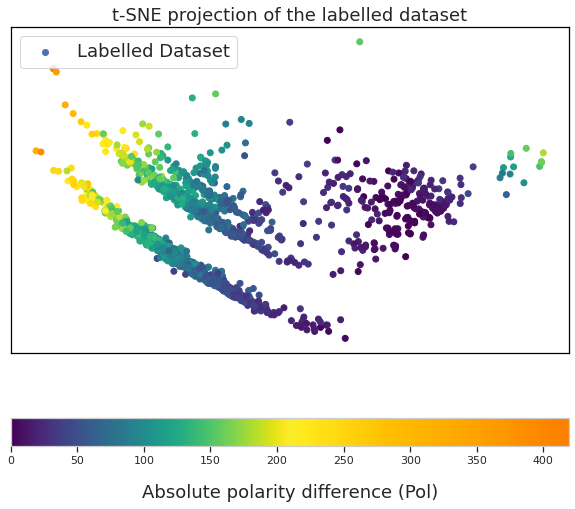

In [ ]:
import seaborn as sns
from matplotlib import rc
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.font_manager
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid']=False


fig, ax = plt.subplots(figsize=(10,8))

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.axis(aspect='equal')
ax.set(adjustable='box')#, aspect='equal')
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.axis('on')

#fig = plt.figure()
#ax = fig.add_subplot(111)
sns.set(rc={'figure.figsize':(10 ,10)})
sns.set_style("whitegrid", {'axes.grid' : False})


s = ax.scatter(embedding[:-2, 0], embedding[:-2, 1],  label='Labelled Dataset' ,  c= mw_color , cmap=newcmp)
##ax.scatter(pyr.emb1, pyr.emb2,  label='Pyrene Co-crystals', color='orange' )#,  c =kmeans.labels_, cmap='viridis')

##ax.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='green', label='(1)',  s=150)
##ax.scatter(embedding[-1:, 0], embedding[-1:, 1], color='red', label='(2)', s=150)


cbar = plt.colorbar(s, ax=ax, orientation='horizontal', fraction=.1)
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_xaxis().labelpad = 18
cbar.ax.set_xlabel('Absolute polarity difference (Pol)', fontsize=18)


#ax.set_xlim(-1, 2)
#ax.set_ylim(-1, 2.5)
ax.tick_params(axis = 'both', which='both', width=2)
ax.tick_params(axis = 'both', which='major', length=14)
ax.tick_params(axis = 'both', which='minor', length=8, color='black')
ax.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
#major_ticks_x = np.arange(0, 25, 10)
#minor_ticks_x = np.arange(0, 25,5)
#major_ticks_y = np.arange(0,25, 10)
#minor_ticks_y = np.arange(0, 25, 5)
#ax.set_xticks(major_ticks_x)
#ax.set_xticks(minor_ticks_x, minor=True)
#ax.set_yticks(major_ticks_y)
#ax.set_yticks(minor_ticks_y, minor=True)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('t-SNE projection of the labelled dataset', fontsize=18);
plt.xlabel('PCA_1')

ax.set_ylabel('PCA2_2')
plt.legend(prop={'size': 18})#, loc=(0.3, -0.47))
plt.savefig('pca_1.png',  rasterized=True,  bbox_inches="tight", dpi=600)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  if sys.path[0] == '':


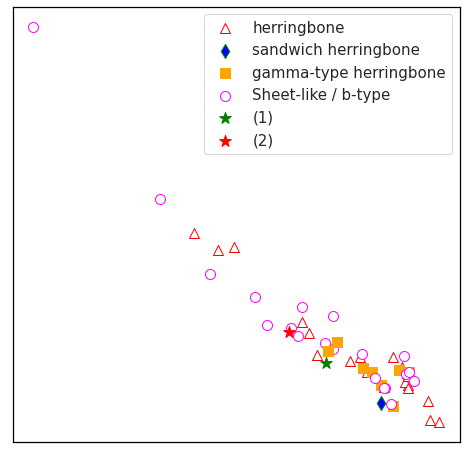

In [ ]:

fig, ax = plt.subplots(figsize=(8,8))

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.axis(aspect='equal')
ax.set(adjustable='box')#, aspect='equal')
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.axis('on')

#fig = plt.figure()
#ax = fig.add_subplot(111)
sns.set(rc={'figure.figsize':(10 ,10)})
sns.set_style("whitegrid", {'axes.grid' : False})

ax.scatter(pyr.emb1[pyr.pack ==1], pyr.emb2[pyr.pack ==1], s=100, marker = '^', color='white', edgecolors='red', label='herringbone')#,  c=y, cmap='viridis') #label='Pyrene Co-crystals' ,
ax.scatter(pyr.emb1[pyr.pack ==2], pyr.emb2[pyr.pack ==2], s=100, marker = 'd', color='blue', edgecolors='green', label='sandwich herringbone')
ax.scatter(pyr.emb1[pyr.pack ==3], pyr.emb2[pyr.pack ==3], s=100, marker = 's', color='orange', edgecolors='orange', label='gamma-type herringbone')
ax.scatter(pyr.emb1[pyr.pack ==4], pyr.emb2[pyr.pack ==4], s=100, marker = 'o', color='white', edgecolors='magenta', label='Sheet-like / b-type')

#ax.scatter(embedding[:, 0], embedding[:, 1], s=100,  label='Labelled Dataset',color='blue')#  c =kmeans.labels_)
ax.scatter(embedding[-2:-1, 0], embedding[-2:-1, 1], color='green', label='(1)', s=150, marker='*')
ax.scatter(embedding[-1:, 0], embedding[-1:, 1], color='red', label='(2)', s=150, marker='*')
ax.scatter(pyr[pyr.Identifier=='PYRPMA11'].emb1, pyr[pyr.Identifier=='PYRPMA11'].emb2 ,s=100, marker = 's', color='orange', edgecolors='orange')#, label='gamma-type herringbone')
ax.scatter(pyr[pyr.Identifier=='PYRTCQ03'].emb1, pyr[pyr.Identifier=='PYRTCQ03'].emb2 ,s=100, marker = 's', color='orange', edgecolors='orange')#, label='gamma-type herringbone')

#ax.set_xlim(-5, 5)
#ax.set_ylim(-5, 1)
#ax.tick_params(axis = 'both', which='both', width=2)
#ax.tick_params(axis = 'both', which='major', length=14)
#ax.tick_params(axis = 'both', which='minor', length=8, color='black')
#ax.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
#major_ticks_x = np.arange(-50, -40, 40)
#minor_ticks_x = np.arange(-50, -40, 20)
#major_ticks_y = np.arange(-50, -40, 40)
#minor_ticks_y = np.arange(-50, -4, 20)
#ax.set_xticks(major_ticks_x)
#ax.set_xticks(minor_ticks_x, minor=True)
#ax.set_yticks(major_ticks_y)
#ax.set_yticks(minor_ticks_y, minor=True)
#plt.legend(prop={'size': 18}, loc='upper right', edgecolor='black')
#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.legend(fontsize=15)
#plt.savefig('pca_eucl_small.png', dpi=600)